# Project: What sells a car? 

__Purpose of the project:__


At Crankshaft List, hundreds of free advertisements for vehicles are published on site every day. We studied the data collected over the last few years to determine which factors influence the price of a vehicle. The purponse of the `What sells a car?` project is to analyze data from vehicles, such as model, model year, condition of the vehicle, number of cylinders, type of fuel, type of transmission, and other characteristic of vehicles; and determine which of these vehicle attributes influence the pricing of a vehicle.

For this project, we studied the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition and plotted histograms for each of these parameters. Similarly, we analyzed how outliers affected the form and readability of the histograms. For these plots, we determined the upper limits of outliers, removed the outliers and stored them in a separate DataFrame, and continued working with the filtered data without outliers.

With the filtered data, we used it to plot new histograms, compared them with the earlier histograms (the ones that included outliers) and drew conclusions for the distributions. Similarly, we studied how many days advertisements were displayed (days_listed), plotted a histogram, and calculated the mean and median values for the distributions to describe the typical lifetime of an ad. With the distribution descriptive values, we determined when ads were removed quickly, and when they were listed for an abnormally long time.

Finally, we analyzed the number of ads and the average price for each type of vehicle. Furthermore, we plotted a graph showing the dependence of the number of ads on the vehicle type. With this in mind, we selected the two types with the greatest number of ads. The last question we answered was __What factors impact the price most?__ Fot this, we took each of the popular types we detected at the previous stage and studied whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), we plotted box-and-whisker charts, and created scatterplots for the rest. When analyzing categorical variables, note that we selected categories thad had at least 50 ads; otherwise, their parameters wouldn't been valid for our analysis.

## Initialization

__Libraries used for analysis__

In [1]:
# Loading all the libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## Load data

The DataFrame containing information about vehicles and characteristics were assigned to the variable __data__.

In [2]:
#data file converted into a DataFrame
data=pd.read_csv('/datasets/vehicles_us.csv')

## Explore initial data

### Description of `data`

Based on `data.info`, there are a total of 13 columns, and 51,525 rows in `data`. Each row in `data` represents data for one vehicle. The raw data has null values for columns: __`model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`__. We noticed the columns that contain null values have a range between 7.02% and 50.37% of null values. Columns: __`model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`__ have percentages of null values of 7.02%, 10.21%, 15.32%, 17.96%, and 50.37%, respectively. 

The dataset contains the following fields:
- `price` -price for vehicle at its given condition when the ad was published.
- `model_year`- the model year of vehicle.
- `model` - model of the vehicle.
- `condition`- condition categories describing vehicle at time ad was published.
- `cylinders` - number of cylinders in vehicle.
- `fuel` — type of fuel used in vehicle. e.g. gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published.
- `transmission`- type of transmission used in vehicle.
- `paint_color`- paint color of vehicle.
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type). 
- `date_posted` — the date the ad was published. 
- `days_listed` — from publication to removal. 

In [3]:
# general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# sample of data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
#checking for missing values in `data`
columns_null_values=data.isnull().sum().sort_values(ascending = False)
percentage_columns_null_values=(columns_null_values/len(data)) *100
percentage_columns_null_values

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Fixing innapropriate data types in columns
The columns that had innapropriate data types include: `model_year`, `cylinders`, `odometer`, `is_4wd`, and `date_posted`. 

The correct data type for the columns, mentioned previously, are listed below: 

- `model_year` should be datetime64[ns]
- `cylinders`  should be int64
- `odometer`   should be int64
- `is_4wd`     should be int64 (Boolean 1=True or 0=False)
- `date_posted`should be datetime64[ns]



In [6]:
# data types in columns
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

### Conclusions and further steps for initial data

The initial data had signinficant amounts of null values in the columns: __`model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`__ ; therefore, the next steps entailed to analyze the patterns of missing values and replace null values in these columns. The patterns of missing values were important because it showed about how the information was collected. Similarly, replacing null values with non-null values was important for our analysis because it gave more more representative information about the factors that influence the pricing of a vehicle. 
Consequently, the next step was to correct the data type in the columns: `model_year`, `cylinders`, `odometer`, `is_4wd`, and `date_posted`. Fixing the data type in these columns allowed to correctly visualize the data with the correct data type. 

## Treating missing values 

### odometer  

The `odometer` column had a total of 7,891 null values which account for 15.31% of rows in `data.` The columns used to estimate the odometer null values were `model_year` and `condition`. The `odometer_year_pivot` table was used to calculate the medians for vehicles depending on the model year and the condition of the vehicle. However, the `odometer_year_pivot` table had some null values; therefore, the `odometer_condition pivot` table was created to calculate the medians depending on the condition of the vehicles. The `odometer_year_pivot` was used as the primary resource to estimate the odometer for null values, and the `odometer_condition pivot` was used as the secondary resource. The medians were used because the values for odometer had a total of 487 outliers. After applying the function, there were 6 rows that still had null values, and since they accounted for only 0.012% of the data, they were removed from __data__.

In [7]:
odometer_year_pivot=data.pivot_table(index='model_year', columns='condition', 
                                     values='odometer', aggfunc='median')

odometer_condition=data.groupby('condition')['odometer'].median()
print(odometer_year_pivot)
print(odometer_condition)

condition   excellent     fair      good  like new      new  salvage
model_year                                                          
1908.0            NaN      NaN  169328.0       NaN      NaN      NaN
1936.0        30000.0      NaN       NaN       NaN      NaN      NaN
1948.0            NaN      NaN       NaN    4000.0      NaN      NaN
1949.0            NaN      NaN    1800.0       NaN      NaN      NaN
1954.0         3565.0      NaN       NaN       NaN      NaN      NaN
...               ...      ...       ...       ...      ...      ...
2015.0        78327.5  65905.0   84000.0   71000.0  52975.0  46000.0
2016.0        56000.0  72726.0   55189.0   47847.0  22000.0  28000.0
2017.0        42235.0  59800.0   38008.0   39000.0  48287.0  29328.0
2018.0        23689.5  73095.0   21000.0   18852.0     28.0  23810.5
2019.0        14531.0      NaN   20168.5   12606.0    151.0   9621.0

[67 rows x 6 columns]
condition
excellent    104230.0
fair         181613.0
good         129000.0
like

The __odometer__ column had a total o 487 outliers that were statistically greater value anomalies than the rest of the values for odometry. Therefore, we used medians for odometry on the `odometer_year_pivot` and `odometer_condition` tables. 

In [8]:
#checking for outliers in odometer column values

iqr=data.odometer.quantile(0.75)-data.odometer.quantile(0.25)
outlier_min=data.odometer.quantile(0.25)-1.5*iqr
outlier_max=data.odometer.quantile(0.75)+1.5*iqr

#printing number of outliers
print(len(data.query('odometer>@outlier_max')))
print(len(data.query('odometer<@outlier_min')))

487
0


In [9]:
# function to replace null values in `odometer` column

def replacing_odometer_null(row):
    model_year=row['model_year']
    condition=row['condition']
    odometer=row['odometer']
   
    if pd.isna(odometer)==False:
        return odometer 
    if pd.isna(odometer)==True:
        try:
            return odometer_year_pivot[condition][model_year]      
        except:
            try:
                return odometer_condition[condition]
            except:
                return "error"


In [10]:
#applying function to `odometer` column

data['odometer']=data.apply(replacing_odometer_null,axis=1)

#checking if we still have null values
print(len(data.query('odometer=="error"')))

print('Missing Data after applying functions: ','{:.3%}'.format(len(data.query('odometer.isnull()'))/len(data), '%'))

data=data.query('odometer.notnull()')
print('Missing Data after dropping rows: ','{:.3%}'.format(len(data.query('odometer.isnull()'))/len(data), '%'))

0
Missing Data after applying functions:  0.012%
Missing Data after dropping rows:  0.000%


### model_year column

The `model_year`column had 3,619 null values in total, which account for 7.02% of the rows in `data`. The values in `model_year` column had a total of 705 outlier that were smaller than 1.5 IQR. 

In [11]:
data.query('model_year.isnull()')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [12]:
#checking for outliers in model_year column values

iqr=data.model_year.quantile(0.75)-data.model_year.quantile(0.25)
outlier_min=data.model_year.quantile(0.25)-1.5*iqr
outlier_max=data.model_year.quantile(0.75)+1.5*iqr

print(len(data.query('model_year>@outlier_max')))
print(len(data.query('model_year<@outlier_min')))

0
705


The columns used to estimate the missing values in column `model_year` were `model` and `condition`. The distribution in the `model_year_pivot` table used median values for `model_year` because the values for `model_year` presented a total of 705 outliers in the model_year distribution that were smaller value anomaies than the rest in model_year values. The `model_year_pivot` table was used as the first resouce to replace null values. However, the `model_year_pivot` table presented null values; therefore, the `condition_year_pivot` table was used as a second resource to fill null values in `model_year` column. 

In [13]:
#creating pivot tables to replace null values in model_year column
model_year_pivot=data.pivot_table(index='model',columns='condition', 
                                  values='model_year', aggfunc= 'median')

condition_year_pivot=data.pivot_table(index='condition',values='model_year',
                                      aggfunc='median')

print(model_year_pivot)
print(condition_year_pivot)

condition          excellent    fair    good  like new     new  salvage
model                                                                  
acura tl              2009.0  2004.0  2007.0    2007.0     NaN      NaN
bmw x5                2010.0  2004.0  2006.0    2009.0     NaN      NaN
buick enclave         2012.0  2011.0  2011.0    2015.0     NaN      NaN
cadillac escalade     2009.0  2004.0  2007.0    2012.0     NaN      NaN
chevrolet camaro      2013.0  1995.0  2010.0    2015.0  2016.0      NaN
...                      ...     ...     ...       ...     ...      ...
toyota sienna         2010.0  2005.0  2006.0    2014.0  2019.0      NaN
toyota tacoma         2012.0  2004.0  2007.0    2016.0  2013.0   2011.0
toyota tundra         2012.0  2004.0  2006.0    2014.0     NaN   2017.0
volkswagen jetta      2013.0  2006.0  2010.0    2014.0     NaN      NaN
volkswagen passat     2013.0  2005.0  2013.0    2012.5  2008.5   2000.0

[100 rows x 6 columns]
           model_year
condition         

In [14]:
#function used to replace null values in model_year
def replacing_modyear_null(row):
    model_year=row['model_year']
    condition=row['condition']
    model=row['model']
    
    if pd.isna(model_year)==False:
        return model_year
    if pd.isna(model_year)==True:
        try:
            return model_year_pivot[condition][model]
        except:
            try:
                return condition_year_pivot[condition]
            except: 
                return "error"

#applying the `replacing_modeyear_null` function to 'model_year' column
data['model_year']=data.apply(replacing_modyear_null,axis=1)

#checking for null values after applying the `replacing_modeyear_null` function. 
print('percentage of error values in model_year', round(len(data.query('model_year == "error"'))*100/len(data),3),'%')

#dropping rows with null values in 'model_year' column since they account for about 0.01% of data rows. 
print('Missing values after applying function',round(len(data.query('model_year.isnull()'))*100/len(data), 3),'%')

data=data.query('model_year.notnull()')

#checking for missing values
data.query('model_year.isnull()')
    

percentage of error values in model_year 0.0 %
Missing values after applying function 0.012 %


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


The percentage of rows that we could not estimate the model year for accounts for 0.01% of the data; Therefore, these rows were eliminated from the original data. Below is the distribution of the data after applying `replacing_modeyear_null` and `replacing_odometer_null` functions, as well as dropping 6 rows that still had null values in `model_year` column. 

In [15]:
#description of data after dropping rows 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51513 non-null  int64  
 1   model_year    51513 non-null  float64
 2   model         51513 non-null  object 
 3   condition     51513 non-null  object 
 4   cylinders     46255 non-null  float64
 5   fuel          51513 non-null  object 
 6   odometer      51513 non-null  float64
 7   transmission  51513 non-null  object 
 8   type          51513 non-null  object 
 9   paint_color   42249 non-null  object 
 10  is_4wd        25568 non-null  float64
 11  date_posted   51513 non-null  object 
 12  days_listed   51513 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


### cylinders column

The column `cylinders` had a total of 5,529 null values, which account for 10.2% of rows in `data`. The columns used to determine the null values of cylinder were vehicle `type`, type of `transmission` and the type of `fuel` it used for combustion. The `cylinder_type_pivot` table was used the __type__ , __transmission__, and __fuel__ columns to calculate the means of cylinder per category. There were not outliers in values for cylinders; therfore, we used means values for cylinders in the pivot tables. The `cylinder_type_pivot` was used as a primary resource to fill in null values in `cylinders` column, but this table had missing values for some of its categories; therefore, the `cylinders_pivot` table was used as a second resource to fill in null values. 

In [16]:
data.query('cylinders.isnull()')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


There were 0 outliers in the raw data in values of cylinders. 

In [17]:
#checking for outlier in cylinders column values

iqr=data.cylinders.quantile(0.75)-data.cylinders.quantile(0.25)
outlier_min=data.cylinders.quantile(0.25)-1.5*iqr
outlier_max=data.cylinders.quantile(0.75)+1.5*iqr

print(len(data.query('cylinders>@outlier_max')))
print(len(data.query('cylinders<@outlier_min')))

0
0


In [18]:
cylinder_type_pivot=data.pivot_table(index=['type','transmission'], columns='fuel', 
                                     values='cylinders', aggfunc='mean')


cylinder_pivot=data.pivot_table(index='transmission', columns='fuel', 
                                values='cylinders', aggfunc='mean')
print(cylinder_type_pivot)
cylinder_pivot

fuel                        diesel  electric        gas    hybrid     other
type        transmission                                                   
SUV         automatic     6.400000       NaN   5.895207  5.857143  6.666667
            manual        7.000000       NaN   5.516484       NaN       NaN
            other              NaN       NaN   7.666667       NaN       NaN
bus         automatic          NaN       NaN   9.100000       NaN       NaN
convertible automatic          NaN       NaN   6.786885       NaN  6.666667
            manual             NaN       NaN   7.406250       NaN       NaN
            other              NaN       NaN  10.000000       NaN       NaN
coupe       automatic     4.000000       NaN   6.020336  4.000000       NaN
            manual             NaN       NaN   6.912195       NaN  7.000000
            other              NaN       NaN   7.047259       NaN       NaN
hatchback   automatic     4.000000       4.0   4.120069  4.010526  4.000000
            

fuel,diesel,electric,gas,hybrid,other
transmission,,,,,
automatic,7.201855,7.0,6.047337,4.230556,6.828571
manual,6.469388,NaN,5.605433,4.000000,7.333333
other,6.307692,NaN,7.000633,4.000000,7.900000


In [19]:
#replacing null values in cylinders with 'missing' value for calculations using 'replacing_cylinders_null' function

#function used to replace null values in cylidners column
def replacing_cylinders_null(row):
    transmission=row['transmission']
    fuel=row['fuel']
    cylinders=row['cylinders']
    type_v=row['type']
    
    if pd.isna(cylinders)==False:
        return cylinders
    
    if pd.isna(cylinders)==True:
        try:
            return cylinder_type_pivot[fuel][transmission][type_v]
        except:
            try:
                return cylinder_pivot[fuel][transmission]
            except: 
                return "error"
            
    
#applying the 'replacing_cylinders_null' function to 'cylinders' column
data['cylinders']=data.apply(replacing_cylinders_null,axis=1)

print('percentage of error values after function:', len(data.query('cylinders=="error"'))*100/len(data),'%')
print('percentage of null values after function:', len(data.query('cylinders=="error"'))*100/len(data), "%")


#checking for null values. 
print(len(data.query('cylinders =="error"')))
len(data.query('cylinders.isnull()'))

percentage of error values after function: 0.0 %
percentage of null values after function: 0.0 %
0


0

### paint_color column

The `paint_color`column had a total of 9,264 rows with null values. This accounts for 17.98% of the total rows in data. We replaced these values with 'no_data' values, as the use of mode is not a good practice in this context. 

In [20]:
len(data.query('paint_color.isnull()'))/len(data)

0.17983809912061033

In [21]:
#replacing null values in paint color with 'unknown' value
   
data.paint_color.fillna('no_data',inplace=True)
    
#checking for null values in 'paint_color' column
data.query('paint_color=="no_data"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,no_data,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,no_data,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,no_data,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,no_data,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,no_data,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,no_data,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,no_data,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,no_data,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,78327.5,automatic,coupe,no_data,NaN,2018-11-24,89


### is_4w column

The `is_4wd` column had a total of 25,953 null values, which accounted for 50.37% of data. The `fourwd_data` table was used to slice the rows that did not have null values in the __is_4wd__ column. One conclusion about the `fourwd_data` is that there were not values other than __1.0__ in the `is_4wd` column. Thefore, the null values in `is_4wd` column were replaced with values of __1.0__. One possible reason could be that information for the `is_4wd` was not imputed in site. 

In [22]:
fourwd_data=data.query('is_4wd.notnull()')
fourwd_data.query('is_4wd!=1.0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [23]:

data.fillna(1.0, inplace= True )
#checking for missing values in 'is_4wd' column 
print(data.is_4wd.unique())

#distribution of data after replacing null values
data.info()

[1.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51513 non-null  int64  
 1   model_year    51513 non-null  float64
 2   model         51513 non-null  object 
 3   condition     51513 non-null  object 
 4   cylinders     51513 non-null  float64
 5   fuel          51513 non-null  object 
 6   odometer      51513 non-null  float64
 7   transmission  51513 non-null  object 
 8   type          51513 non-null  object 
 9   paint_color   51513 non-null  object 
 10  is_4wd        51513 non-null  float64
 11  date_posted   51513 non-null  object 
 12  days_listed   51513 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


## Fix data types

The columns `model_year`, `cylinders`, `odometer`, `is_4wd`, and `date_posted` were replaced to the correct data type. 

### model_year column

The __model_year__ column was changed to __datetime64[ns]__ data type. 

In [24]:

data['model_year']=pd.to_datetime(data['model_year'],format='%Y')


In [25]:
data['model_year']=pd.DatetimeIndex(data['model_year']).year

### cylinders column

The __cylinders__ column was changed to __int64__ data type. 

In [26]:
data['cylinders']=data.cylinders.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51513 non-null  int64  
 1   model_year    51513 non-null  int64  
 2   model         51513 non-null  object 
 3   condition     51513 non-null  object 
 4   cylinders     51513 non-null  int64  
 5   fuel          51513 non-null  object 
 6   odometer      51513 non-null  float64
 7   transmission  51513 non-null  object 
 8   type          51513 non-null  object 
 9   paint_color   51513 non-null  object 
 10  is_4wd        51513 non-null  float64
 11  date_posted   51513 non-null  object 
 12  days_listed   51513 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 5.5+ MB


### odometer column

The __odometer__ column was changed to __int64__ data type. 

In [27]:
data['odometer']=data.odometer.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51513 non-null  int64  
 1   model_year    51513 non-null  int64  
 2   model         51513 non-null  object 
 3   condition     51513 non-null  object 
 4   cylinders     51513 non-null  int64  
 5   fuel          51513 non-null  object 
 6   odometer      51513 non-null  int64  
 7   transmission  51513 non-null  object 
 8   type          51513 non-null  object 
 9   paint_color   51513 non-null  object 
 10  is_4wd        51513 non-null  float64
 11  date_posted   51513 non-null  object 
 12  days_listed   51513 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 5.5+ MB


### is_4wd column

The column __is_4wd__ was changed to __int64__ data type. 

In [28]:
data['is_4wd']=data.is_4wd.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51513 non-null  int64 
 1   model_year    51513 non-null  int64 
 2   model         51513 non-null  object
 3   condition     51513 non-null  object
 4   cylinders     51513 non-null  int64 
 5   fuel          51513 non-null  object
 6   odometer      51513 non-null  int64 
 7   transmission  51513 non-null  object
 8   type          51513 non-null  object
 9   paint_color   51513 non-null  object
 10  is_4wd        51513 non-null  int64 
 11  date_posted   51513 non-null  object
 12  days_listed   51513 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.5+ MB


### date_posted column

The column __date_posted__ was changed to __datetime64[ns]__ data format. 

In [29]:
#sample 2018-06-23
data['date_posted']=pd.to_datetime(data['date_posted'],format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51513 non-null  int64         
 1   model_year    51513 non-null  int64         
 2   model         51513 non-null  object        
 3   condition     51513 non-null  object        
 4   cylinders     51513 non-null  int64         
 5   fuel          51513 non-null  object        
 6   odometer      51513 non-null  int64         
 7   transmission  51513 non-null  object        
 8   type          51513 non-null  object        
 9   paint_color   51513 non-null  object        
 10  is_4wd        51513 non-null  int64         
 11  date_posted   51513 non-null  datetime64[ns]
 12  days_listed   51513 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.5+ MB


## Enrich data

The `Enrich data` section was used to add additional columns in the __data__ and simplify analysis of factors that influence the pricing of a vehicle. The column `condition` was replaced with numerical values as rating from 1 to 6, to describe the overall condition of the car, at the time of posting the ads. The rating cateries for __condition__ column are listed below: 

- new rating:       6
- like new rating:  5 
- excellent rating: 4
- good rating:      3 
- fair rating:      2
- salvage rating:   1

In [30]:
# replacing  the condition values with something that can be manipulated more easily

replace_data={"good":3 , "like new":5, "fair":2, "excellent":4, "salvage":1, "new":6}

data=data.replace({"condition":replace_data})
data


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,no_data,1,2018-06-23,19
1,25500,2008,ford f-150,3,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,5,4,gas,110000,automatic,sedan,red,1,2019-02-07,79
3,1500,2003,ford f-150,2,8,gas,193850,automatic,pickup,no_data,1,2019-03-22,9
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,1,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,5,6,gas,88136,automatic,sedan,black,1,2018-10-03,37
51521,2700,2002,honda civic,1,4,gas,181500,automatic,sedan,white,1,2018-11-14,22
51522,3950,2009,hyundai sonata,4,4,gas,128000,automatic,sedan,blue,1,2018-11-15,32
51523,7455,2013,toyota corolla,3,4,gas,139573,automatic,sedan,black,1,2018-07-02,71


### weekday_posted, month_posted, year_posted, and vehicle_age columns

Similarly, we added new columns that described datetime vales for whe the ad was placed on the website. The purpose of creating these columns was to visualize and analyze patterns in which the ads where posted in the website. Similarly, the age of each vehicle was calculated and put into the new column `vehicle_age`. This values in this column was calculated by subtracting the year in which the ad was places by the model year. The vehicle age value was useful for analysis to determine if the vehicle usage in years affects the pricing of a vehicle. 

In [31]:
# Adding datetime values for when the ad was placed
data['weekday_posted']=data['date_posted'].dt.weekday
data['month_posted']=data['date_posted'].dt.month
data['year_posted']=data['date_posted'].dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,no_data,1,2018-06-23,19,5,6,2018
1,25500,2008,ford f-150,3,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,5,4,gas,110000,automatic,sedan,red,1,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,2,8,gas,193850,automatic,pickup,no_data,1,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,1,2019-04-02,28,1,4,2019


In [32]:
# Adding the vehicle's age when the ad was placed
data['vehicle_age']=(data.year_posted-data.model_year)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,no_data,1,2018-06-23,19,5,6,2018,7
1,25500,2008,ford f-150,3,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10
2,5500,2013,hyundai sonata,5,4,gas,110000,automatic,sedan,red,1,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,2,8,gas,193850,automatic,pickup,no_data,1,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,1,2019-04-02,28,1,4,2019,2


### avg_miles_per_year
Finally, we added the `avg_miles_per_year` column to determine if the vehicle's mileage per year affected the pricing of a vehicle. 

In [33]:
# Adding the vehicle's average mileage per year
data['avg_miles_per_year']=round(data['odometer']/data['vehicle_age'],2)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_miles_per_year
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,no_data,1,2018-06-23,19,5,6,2018,7,20714.29
1,25500,2008,ford f-150,3,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10,8870.50
2,5500,2013,hyundai sonata,5,4,gas,110000,automatic,sedan,red,1,2019-02-07,79,3,2,2019,6,18333.33
3,1500,2003,ford f-150,2,8,gas,193850,automatic,pickup,no_data,1,2019-03-22,9,4,3,2019,16,12115.62
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,1,2019-04-02,28,1,4,2019,2,40451.50


## Check and clean data

### avg_miles_per_year column

The `avg_miles_per_year` column had two missing values because it had 0 mileage and 0 years of use. Therefore, the null values were replaces with values of 0 since their mileage per year is zero. The `avg_miles_per_year` column also presented values of 'inf', which means that the vehicle had values for the odometer column, but had 0 years of age at the time the ad was posted. Therefore, for these values, we calculated the `avg_miles_per_year` values by dividing their odometry by their age fration, depending on the month the ad was posted. 

In [34]:
# general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51513 non-null  int64         
 1   model_year          51513 non-null  int64         
 2   model               51513 non-null  object        
 3   condition           51513 non-null  int64         
 4   cylinders           51513 non-null  int64         
 5   fuel                51513 non-null  object        
 6   odometer            51513 non-null  int64         
 7   transmission        51513 non-null  object        
 8   type                51513 non-null  object        
 9   paint_color         51513 non-null  object        
 10  is_4wd              51513 non-null  int64         
 11  date_posted         51513 non-null  datetime64[ns]
 12  days_listed         51513 non-null  int64         
 13  weekday_posted      51513 non-null  int64     

In [35]:
#replacing null values for `avg_miles_per_year` column
print(data.query('avg_miles_per_year.isnull()'))
data.avg_miles_per_year.fillna(0,inplace=True)

       price  model_year         model  condition  cylinders    fuel  \
17037  45400        2018      ram 3500          4          6  diesel   
40489  15900        2018  toyota prius          4          4  hybrid   

       odometer transmission       type paint_color  is_4wd date_posted  \
17037         0    automatic     pickup       black       1  2018-12-16   
40489         0    automatic  hatchback        blue       1  2018-07-30   

       days_listed  weekday_posted  month_posted  year_posted  vehicle_age  \
17037           18               6            12         2018            0   
40489           31               0             7         2018            0   

       avg_miles_per_year  
17037                 NaN  
40489                 NaN  


In [36]:
#replacing 'inf' values for `avg_miles_per_year` column
data.loc[(data['odometer']>0)&(data['vehicle_age']==0),'avg_miles_per_year']= round(data['odometer']/(data['month_posted']/12),2)
data.query('odometer>0 and vehicle_age==0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_miles_per_year
19,13990,2018,hyundai elantra,4,4,gas,31932,automatic,sedan,red,1,2018-08-25,27,5,8,2018,0,47898.00
71,23300,2018,nissan frontier crew cab sv,3,6,gas,27493,other,pickup,no_data,1,2018-10-13,36,5,10,2018,0,32991.60
78,23800,2019,nissan frontier crew cab sv,3,6,gas,10899,other,pickup,silver,1,2019-02-28,30,3,2,2019,0,65394.00
99,39950,2018,chevrolet silverado,4,8,gas,18500,automatic,truck,no_data,1,2018-08-05,16,6,8,2018,0,27750.00
106,21500,2019,nissan frontier crew cab sv,3,6,gas,16168,other,pickup,white,1,2019-03-29,70,4,3,2019,0,64672.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018,ram 1500,4,8,gas,9446,automatic,truck,no_data,1,2018-05-06,39,6,5,2018,0,22670.40
51442,28990,2018,ford f150,4,6,gas,10152,automatic,truck,white,1,2018-06-13,47,2,6,2018,0,20304.00
51446,15999,2018,chevrolet malibu,4,4,gas,50502,automatic,sedan,black,1,2018-07-28,8,5,7,2018,0,86574.86
51447,33990,2019,ram 1500,4,8,gas,9000,automatic,truck,white,1,2019-01-25,36,4,1,2019,0,108000.00


In [37]:
# print a sample of data
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51513 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51513 non-null  int64         
 1   model_year          51513 non-null  int64         
 2   model               51513 non-null  object        
 3   condition           51513 non-null  int64         
 4   cylinders           51513 non-null  int64         
 5   fuel                51513 non-null  object        
 6   odometer            51513 non-null  int64         
 7   transmission        51513 non-null  object        
 8   type                51513 non-null  object        
 9   paint_color         51513 non-null  object        
 10  is_4wd              51513 non-null  int64         
 11  date_posted         51513 non-null  datetime64[ns]
 12  days_listed         51513 non-null  int64         
 13  weekday_posted      51513 non-null  int64     

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_miles_per_year
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,no_data,1,2018-06-23,19,5,6,2018,7,20714.29
1,25500,2008,ford f-150,3,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10,8870.50
2,5500,2013,hyundai sonata,5,4,gas,110000,automatic,sedan,red,1,2019-02-07,79,3,2,2019,6,18333.33
3,1500,2003,ford f-150,2,8,gas,193850,automatic,pickup,no_data,1,2019-03-22,9,4,3,2019,16,12115.62
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,1,2019-04-02,28,1,4,2019,2,40451.50
5,14990,2014,chrysler 300,4,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.50
6,12990,2015,toyota camry,4,4,gas,79212,automatic,sedan,white,1,2018-12-27,73,3,12,2018,3,26404.00
7,15990,2013,honda pilot,4,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.50
8,11500,2012,kia sorento,4,4,gas,104174,automatic,SUV,no_data,1,2018-07-16,19,0,7,2018,6,17362.33
9,9200,2008,honda pilot,4,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.00


## Study core parameters

The following section was used to study the distribution of values in the following parameters: 

- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

### price parameter
The __price__ parameter presented a postive skewed distribution, with a mean  12131.78 USD, median value of 9,000 USD , and a standard deviation of 10038.67 USD. Based on the Boxplot, we identified ouliers greater than 1.5 IQR. 

count     51513.000000
mean      12131.783433
std       10038.679543
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


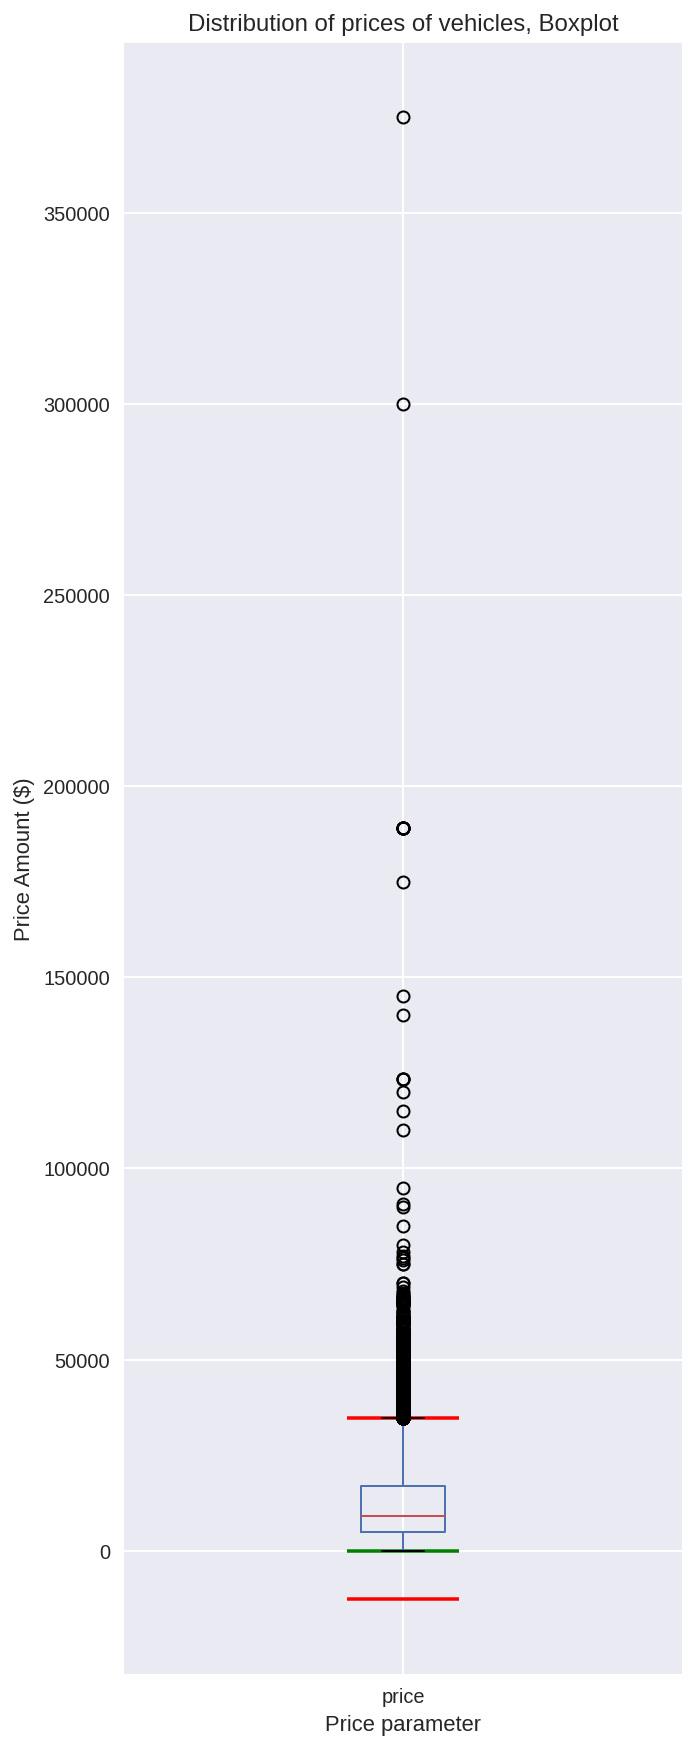

In [38]:
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

#price
print(data.price.describe())
q1=data.price.quantile(0.25)
q3=data.price.quantile(0.75)
iqr=q3-q1

print(data.boxplot('price', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data.price.min(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of prices of vehicles, Boxplot')
plt.ylabel('Price Amount ($)')
plt.xlabel('Price parameter')
plt.show()

### age parameter
The __age__ parameter presented a postive skewed distribution, with a mean of 8.52 years, a median of 7.00 years, and a standard deviation of 6.12 years. Based on the Boxplot, we identified ouliers greater than 1.5 IQR. 

count    51513.000000
mean         8.517267
std          6.118268
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'vehicle_age'}>]]


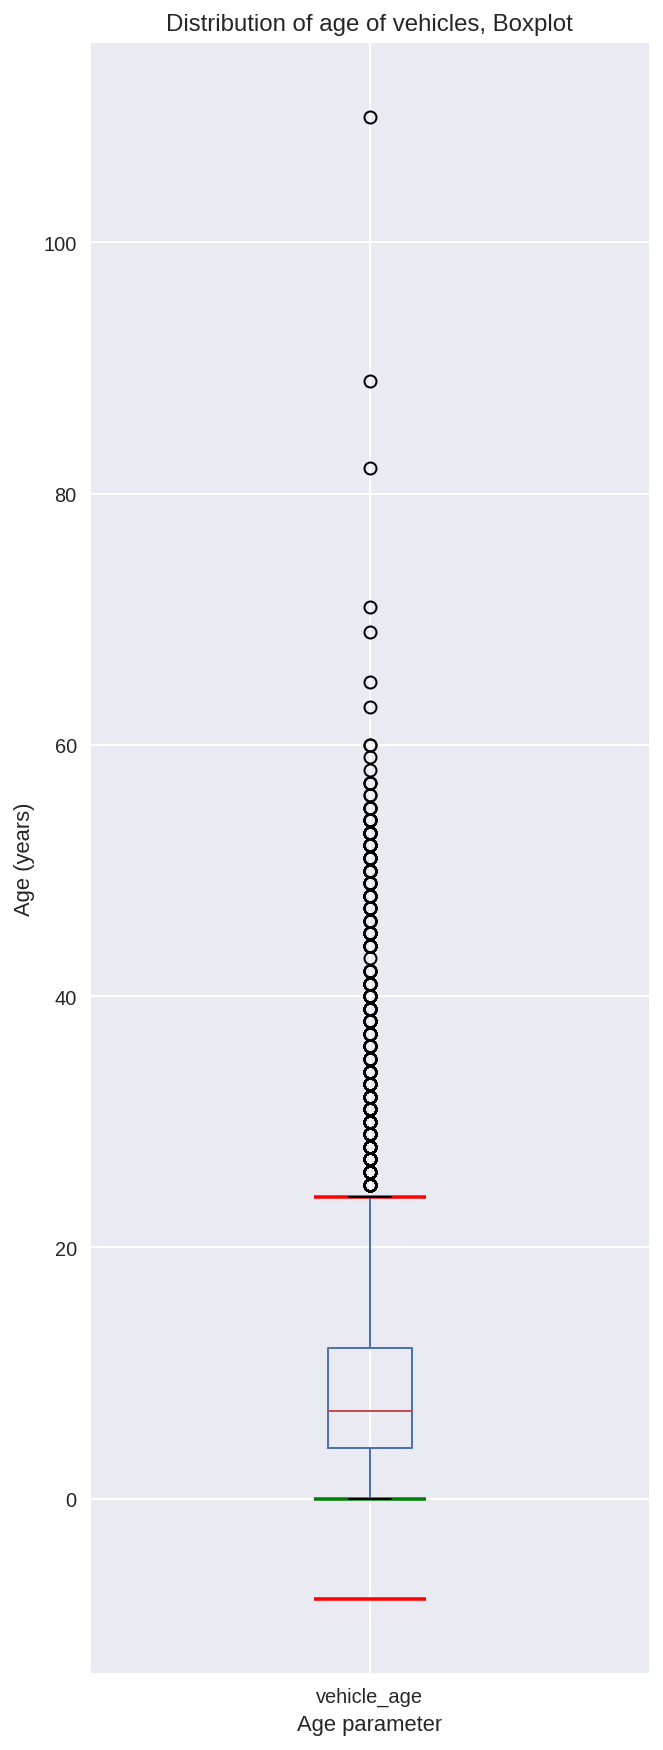

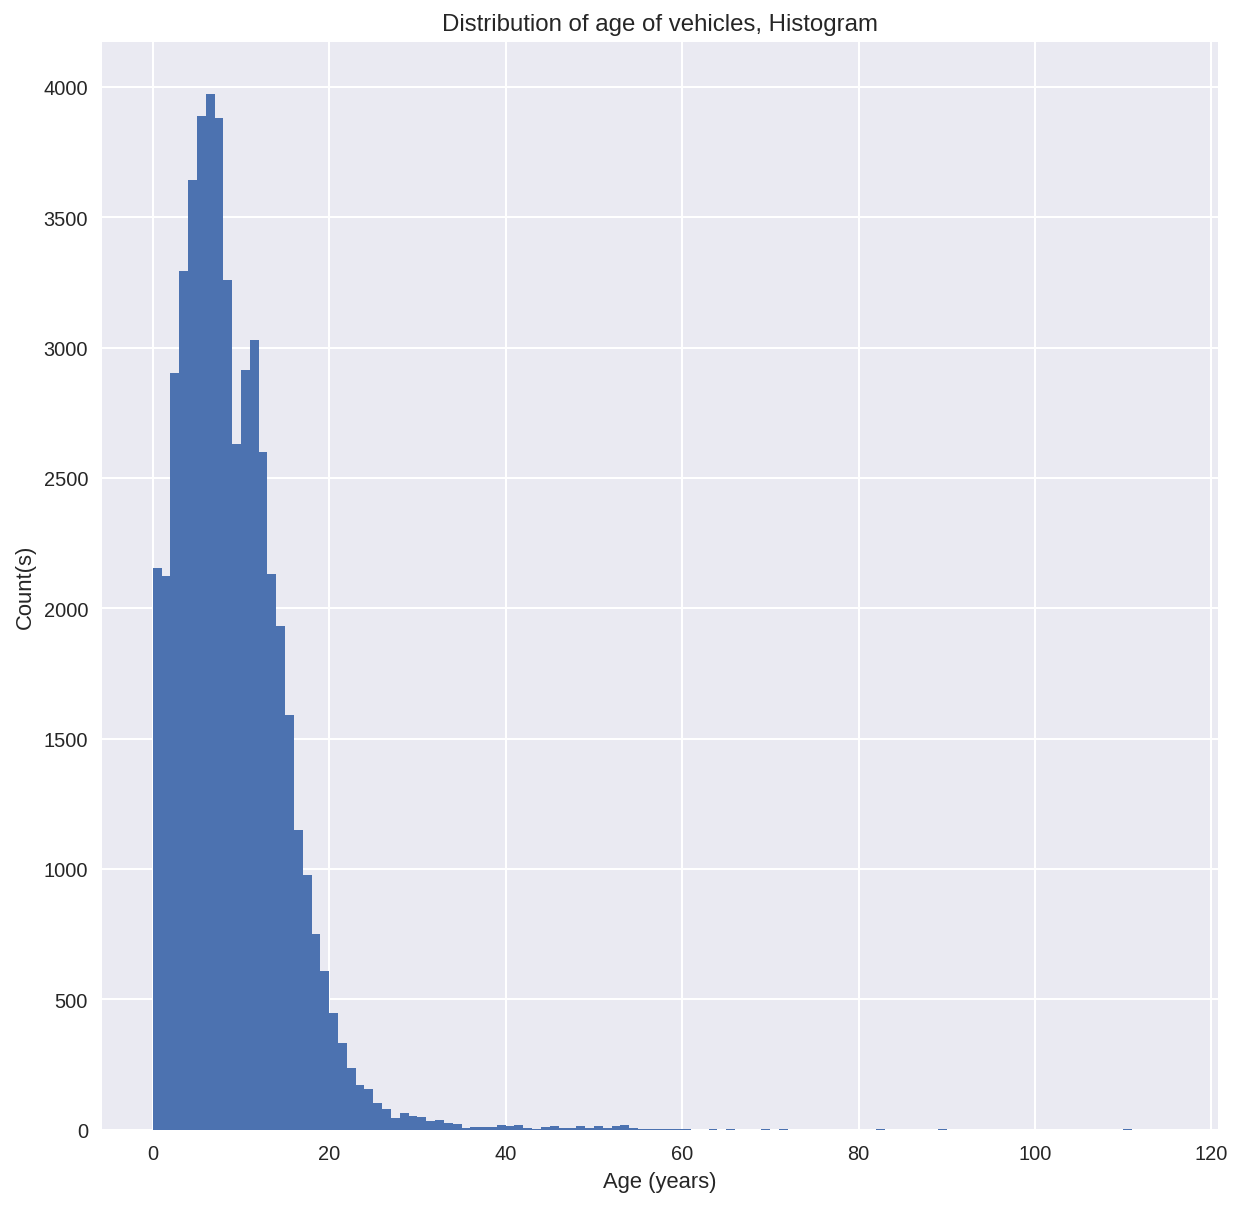

In [39]:
#age

print(data.vehicle_age.describe())
q1=data.vehicle_age.quantile(0.25)
q3=data.vehicle_age.quantile(0.75)
iqr=q3-q1

print(data.boxplot('vehicle_age', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data.vehicle_age.min(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of age of vehicles, Boxplot')
plt.ylabel('Age (years)')
plt.xlabel('Age parameter')

print(data.hist('vehicle_age', range=(0,115), bins=115, figsize=(10,10)))
plt.title('Distribution of age of vehicles, Histogram')
plt.ylabel('Count(s)')
plt.xlabel('Age (years)')
plt.show()

### avg_miles_per_year parameter 
The mileage parameter presented a postive skewed distribution, with a mean of 18,936.13 miles per year, a median of 15,279.64 miles per year. miles, and a standard deviation of 19,555.22 miles per year. Based on the Boxplot, we identified ouliers greater than 1.5 IQR.

count    5.151300e+04
mean     1.893613e+04
std      1.955522e+04
min      0.000000e+00
25%      1.095714e+04
50%      1.527964e+04
75%      2.160160e+04
max      1.884000e+06
Name: avg_miles_per_year, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


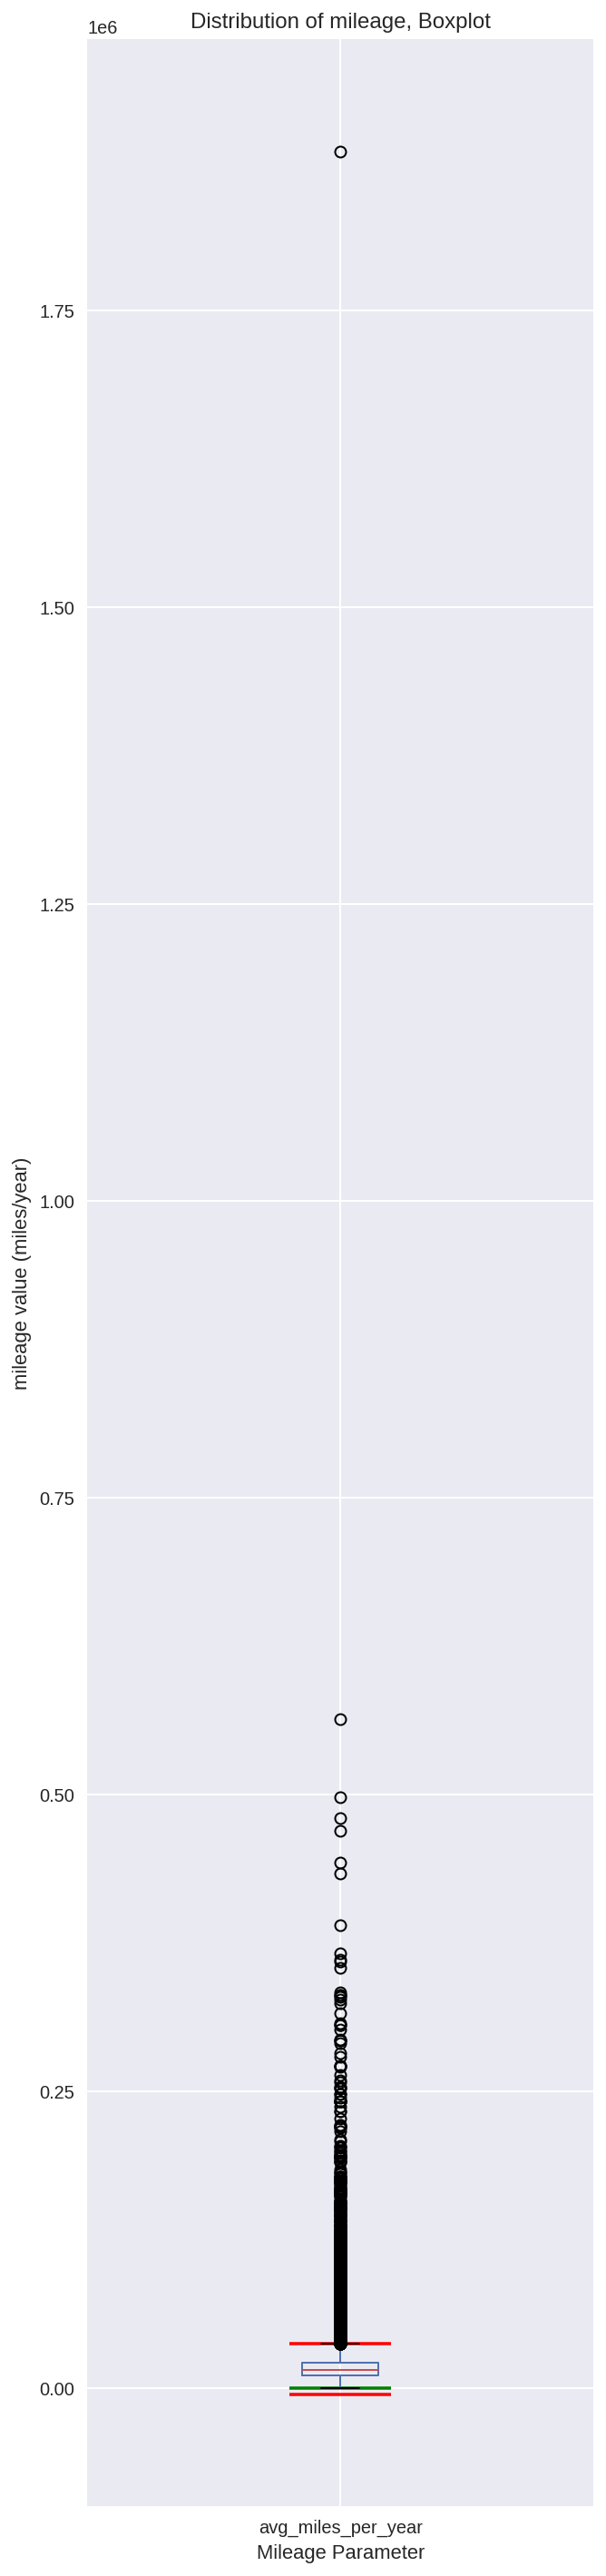

In [40]:
#mileage

print(data.avg_miles_per_year.describe())
q1=data.avg_miles_per_year.quantile(0.25)
q3=data.avg_miles_per_year.quantile(0.75)
iqr=q3-q1

print(data.boxplot('avg_miles_per_year', figsize=(5,25)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data.avg_miles_per_year.min(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of mileage, Boxplot')
plt.xlabel('Mileage Parameter')
plt.ylabel('mileage value (miles/year)')
plt.show()

### cylinders parameter
The cylinders parameter presented a positive skewed distribution, with a mean of 6.11 cylinders, a median of 6 cylinders, and a standard deviation of 1.58 cyliders. Based on the Boxplot, we did not identified ouliers greater or lower than 1.5 IQR.

count    51513.000000
mean         6.115505
std          1.579510
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


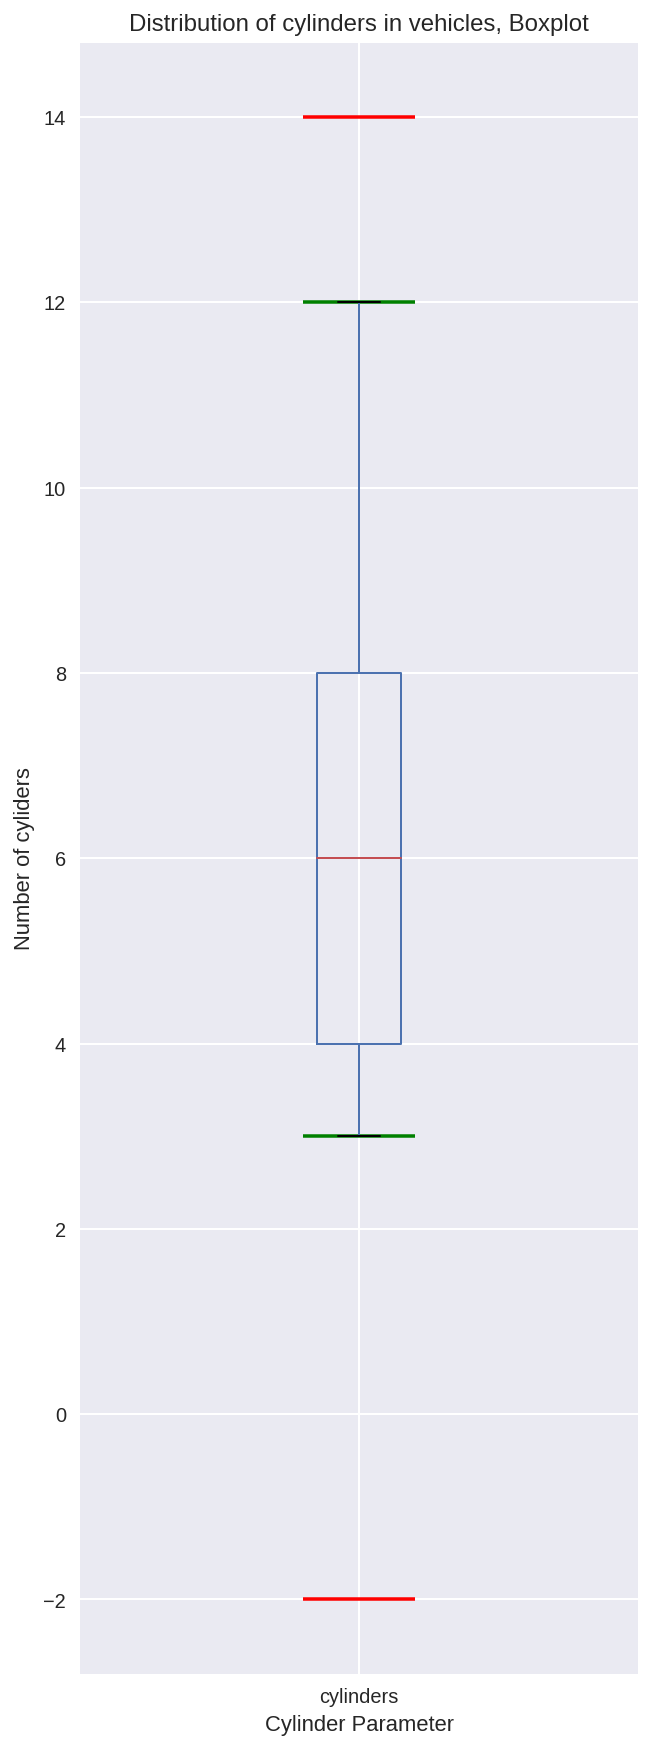

In [41]:
#number of cylinders
print(data.cylinders.describe())
q1=data.cylinders.quantile(0.25)
q3=data.cylinders.quantile(0.75)
iqr=q3-q1

print(data.boxplot('cylinders', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data.cylinders.min(), xmin=0.9,xmax=1.1, color='green')
plt.hlines(y=data.cylinders.max(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of cylinders in vehicles, Boxplot')
plt.xlabel('Cylinder Parameter')
plt.ylabel('Number of cyliders')
plt.show()

### condition parameter
The condition parameter is a categorical parameters and the distrubution is presented in the bar chart displayed below. The condition rating categories that presented highest counts are ratings of 4 and 5, with percentages of 48.1% and 39.10%, respectively. The `condition_counts` boxplot represents the distribution of the condition rating counts. The counts distribution was positive skewed, with a mean of 8585.50 counts, median value of 3173.00 counts, and a standard deviation of 10975.36 counts. There were not count values greater or smaller than 1.5 IQR. 

count    51513.000000
mean         3.637490
std          0.711765
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: condition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


4    0.480888
3    0.391066
5    0.092035
2    0.031157
6    0.002679
1    0.002174
Name: condition, dtype: float64

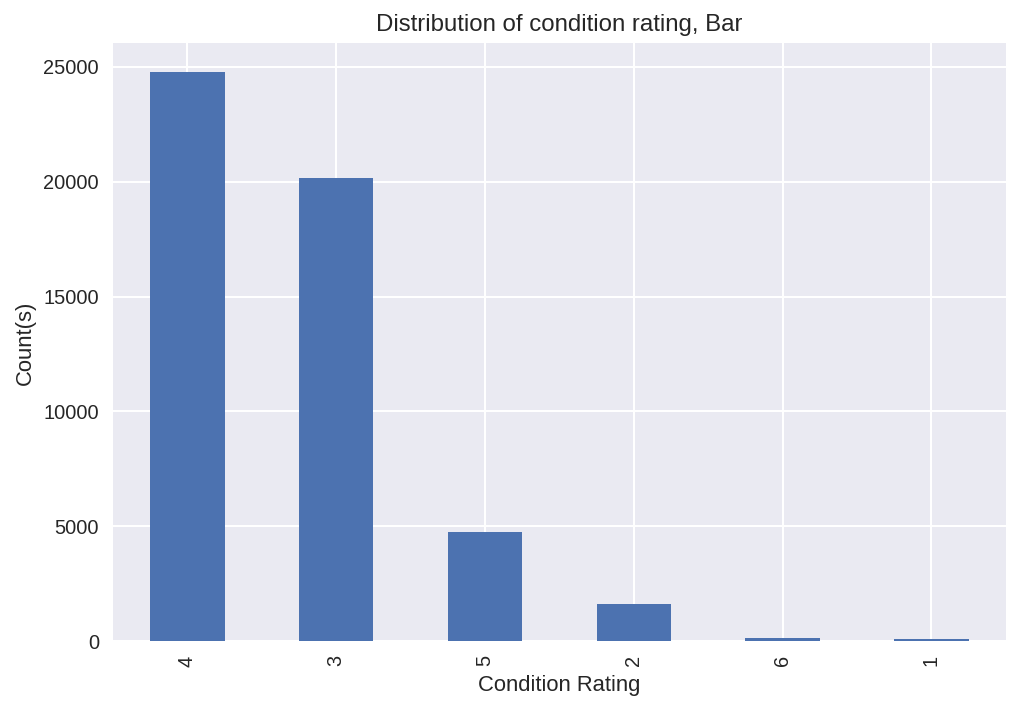

In [42]:
#condition
print(data.condition.describe())

print(data['condition'].value_counts(ascending=False).plot(kind='bar'))
plt.title('Distribution of condition rating, Bar')
plt.xlabel('Condition Rating')
plt.ylabel('Count(s)')

data.condition.value_counts(normalize=True)




count        6.000000
mean      8585.500000
std      10975.361876
min        112.000000
25%        504.750000
50%       3173.000000
75%      16294.000000
max      24772.000000
dtype: float64


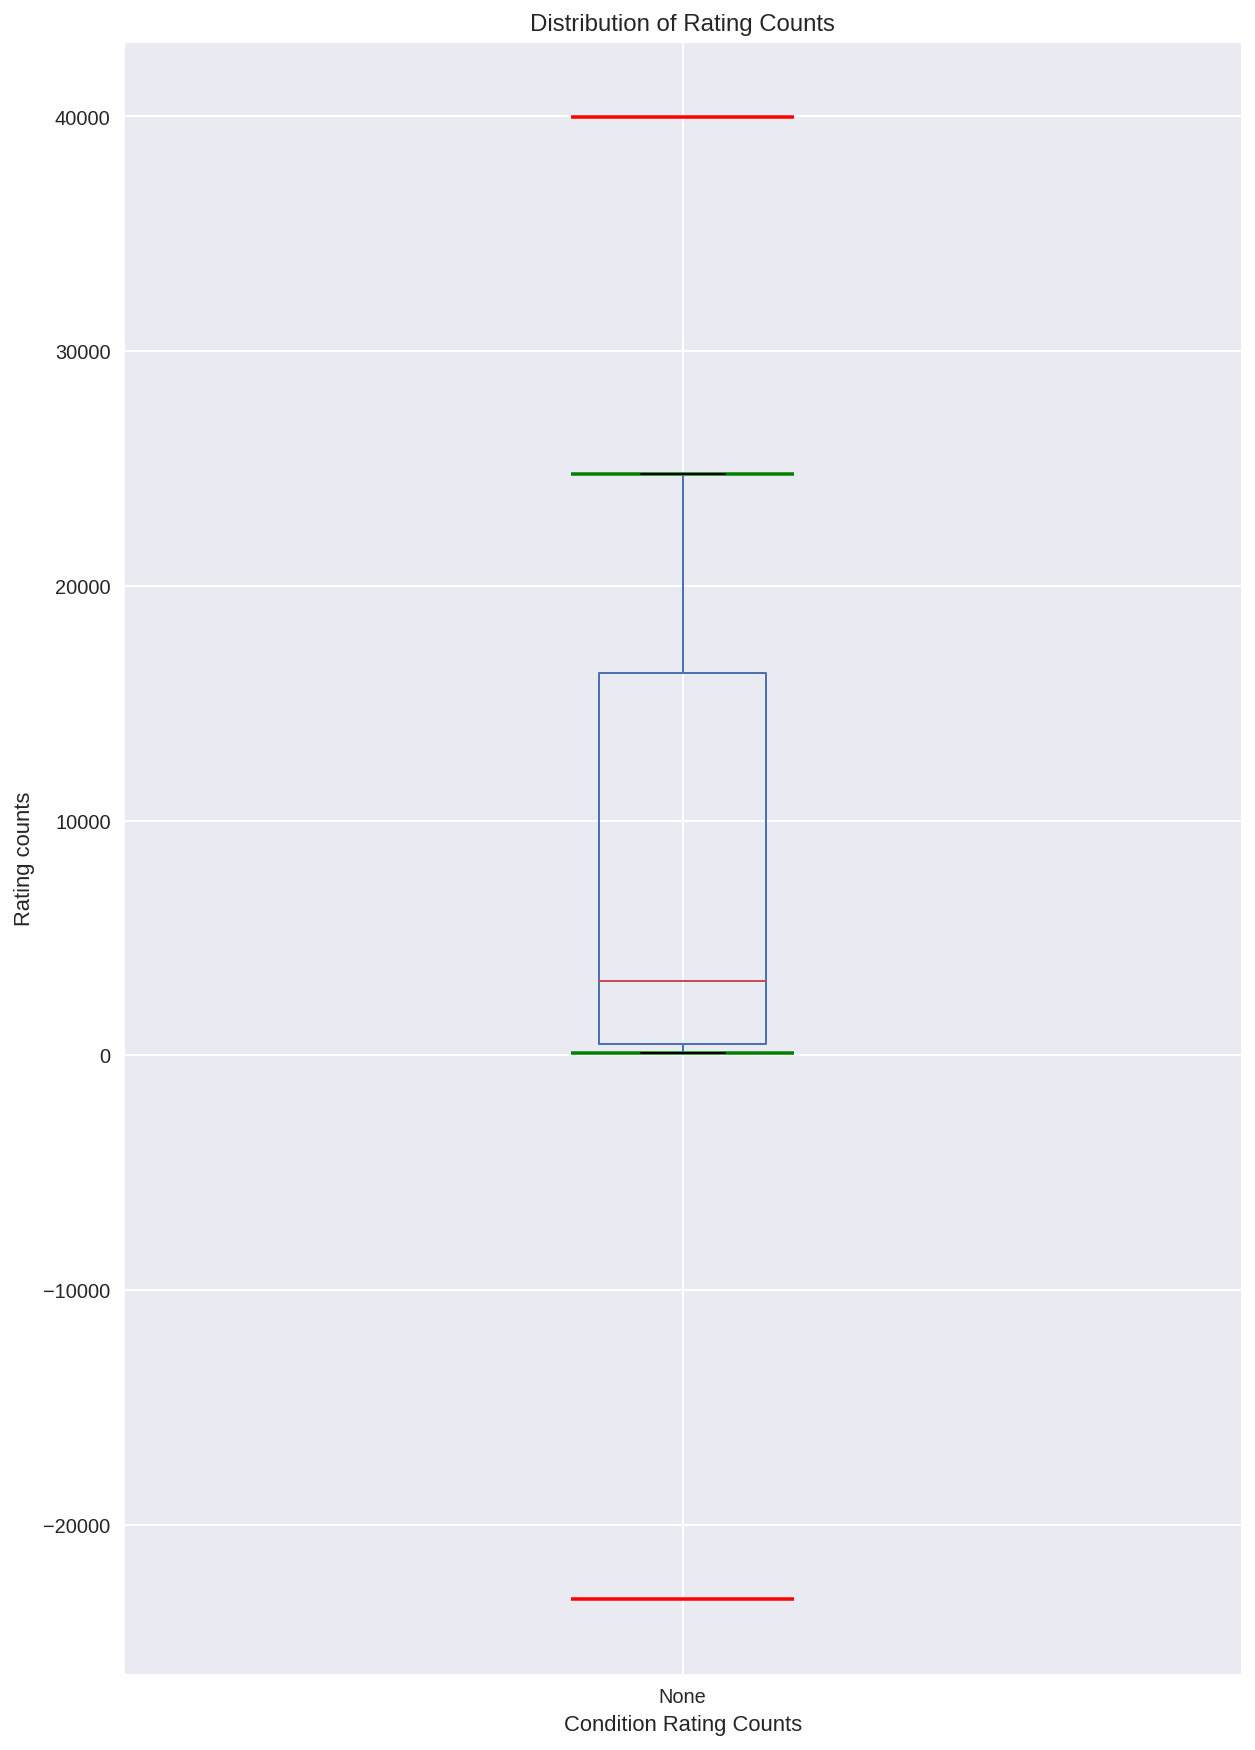

In [43]:
condition_counts=data.pivot_table(index='condition' ,aggfunc='size')
print(condition_counts.describe())
q1=condition_counts.quantile(0.25)
q3=condition_counts.quantile(0.75)
iqr=q3-q1

data.pivot_table(index='condition' ,aggfunc='size').plot(kind='box', figsize=(10,15))
plt.title('Distribution of Rating Counts')
plt.ylabel('Rating counts')
plt.xlabel('Condition Rating Counts')
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=condition_counts.min(), xmin=0.9,xmax=1.1, color='green')
plt.hlines(y=condition_counts.max(), xmin=0.9,xmax=1.1, color='green')
plt.show()

## Study and treat outliers

This section was used to remove rows that contained outliers from the columns: __price, vehicle_age, odometer, and cylinders__. The `parameters_limits` table summarizes the 1.5 IQR range limits (lower and upper). The `parameters_limtit` table was used to filter out values from core parameter columns, and save the values without outliers in the `data_not_outliers` table. 

In [44]:
# Determine the lower limits for outliers
core_parameters=['price', 'vehicle_age','avg_miles_per_year','cylinders']
lower_limit=[]
for parameter in core_parameters:
    lower_range=data[parameter].quantile(0.25)
    lower_limit.append(lower_range)
    
lower_limit_values={'parameters':core_parameters, 'lower_limit_values':lower_limit}
lower_limit_values=pd.DataFrame(lower_limit_values)
lower_limit_values


,parameters,lower_limit_values
0,price,5000.00
1,vehicle_age,4.00
2,avg_miles_per_year,10957.14
3,cylinders,4.00


In [45]:
# Determine the upper limits for outliers
core_parameters=['price', 'vehicle_age','avg_miles_per_year','cylinders']

upper_limit=[]
for parameter in core_parameters:
    upper_range=data[parameter].quantile(0.75)
    upper_limit.append(upper_range)
    
upper_limit_values={'parameters':core_parameters, 'upper_limit_values':upper_limit}
upper_limit_values=pd.DataFrame(upper_limit_values)
upper_limit_values


,parameters,upper_limit_values
0,price,16839.0
1,vehicle_age,12.0
2,avg_miles_per_year,21601.6
3,cylinders,8.0


In [46]:
#summary of upper and lower limits for parameters with outliers
parameters_limits=lower_limit_values.merge(upper_limit_values, on='parameters')
parameters_limits.set_index('parameters',inplace=True)
parameters_limits

,lower_limit_values,upper_limit_values
parameters,,
price,5000.00,16839.0
vehicle_age,4.00,12.0
avg_miles_per_year,10957.14,21601.6
cylinders,4.00,8.0


In [47]:
# Store data without outliers in a separate DataFrame
core_parameters=['price', 'vehicle_age','avg_miles_per_year','cylinders']
for para in core_parameters:
    print(f"{para}_lower=parameters_limits.loc['{para}','lower_limit_values']",
          f"\n{para}_upper=parameters_limits.loc['{para}','upper_limit_values']")

price_lower=parameters_limits.loc['price','lower_limit_values'] 
price_upper=parameters_limits.loc['price','upper_limit_values']
vehicle_age_lower=parameters_limits.loc['vehicle_age','lower_limit_values'] 
vehicle_age_upper=parameters_limits.loc['vehicle_age','upper_limit_values']
avg_miles_per_year_lower=parameters_limits.loc['avg_miles_per_year','lower_limit_values'] 
avg_miles_per_year_upper=parameters_limits.loc['avg_miles_per_year','upper_limit_values']
cylinders_lower=parameters_limits.loc['cylinders','lower_limit_values'] 
cylinders_upper=parameters_limits.loc['cylinders','upper_limit_values']


In [48]:
price_lower=parameters_limits.loc['price','lower_limit_values'] 
price_upper=parameters_limits.loc['price','upper_limit_values']
vehicle_age_lower=parameters_limits.loc['vehicle_age','lower_limit_values'] 
vehicle_age_upper=parameters_limits.loc['vehicle_age','upper_limit_values']
avg_miles_per_year_lower=parameters_limits.loc['avg_miles_per_year','lower_limit_values'] 
avg_miles_per_year_upper=parameters_limits.loc['avg_miles_per_year','upper_limit_values']
cylinders_lower=parameters_limits.loc['cylinders','lower_limit_values'] 
cylinders_upper=parameters_limits.loc['cylinders','upper_limit_values']

data_not_outliers=data.query('@price_lower <= price <= @price_upper & @vehicle_age_lower <= vehicle_age <= @vehicle_age_upper & @avg_miles_per_year_lower <= avg_miles_per_year <= @avg_miles_per_year_upper & @cylinders_lower <= cylinders <= @cylinders_upper')

#summary of statistical description for 'data_not_outliers' table
data_not_outliers.describe()


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_miles_per_year
count,11663.000000,11663.000000,11663.000000,11663.000000,11663.000000,11663.0,11663.000000,11663.000000,11663.000000,11663.000000,11663.000000,11663.000000
mean,9539.731630,2010.410958,3.681729,5.838721,123212.258767,1.0,39.446112,2.997771,6.435737,2018.333276,7.922318,15879.670275
std,3175.932326,2.330027,0.608251,1.520275,33964.836338,0.0,28.551286,1.991492,3.499536,0.471405,2.289044,2825.548353
min,5000.000000,2006.000000,1.000000,4.000000,44000.000000,1.0,0.000000,0.000000,1.000000,2018.000000,4.000000,10957.140000
25%,6950.000000,2008.000000,3.000000,4.000000,99680.000000,1.0,19.000000,1.000000,3.000000,2018.000000,6.000000,13500.000000
50%,8975.000000,2011.000000,4.000000,6.000000,122942.000000,1.0,33.000000,3.000000,6.000000,2018.000000,8.000000,15714.290000
75%,11990.000000,2012.000000,4.000000,8.000000,143659.000000,1.0,53.000000,5.000000,9.000000,2019.000000,10.000000,18140.000000
max,16835.000000,2015.000000,6.000000,8.000000,259000.000000,1.0,271.000000,6.000000,12.000000,2019.000000,12.000000,21601.600000


## Study core parameters without outliers

### core parameter: price
The values of __price__ without outliers presented a positive skewed distribution with a mean of 9,539.73 USD, median value of 8,975.00 USD, and a standard deviation of 3,175.93 USD. Removing the outliers decreased the standard deviantion by 68.36% from the raw data. 

count    11663.000000
mean      9539.731630
std       3175.932326
min       5000.000000
25%       6950.000000
50%       8975.000000
75%      11990.000000
max      16835.000000
Name: price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'price'}>]]
percent change of std witout outliers:  -68.36 %


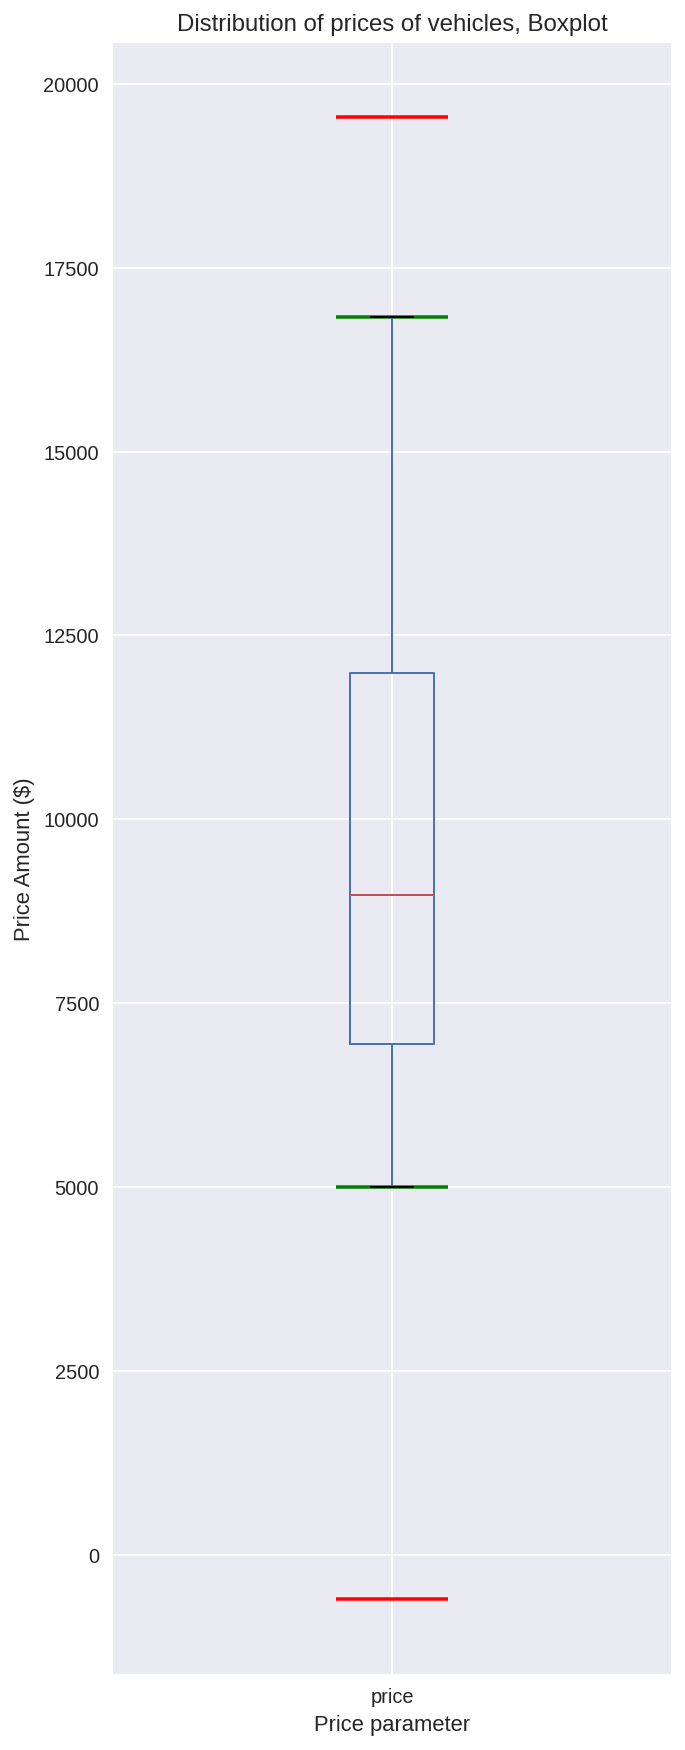

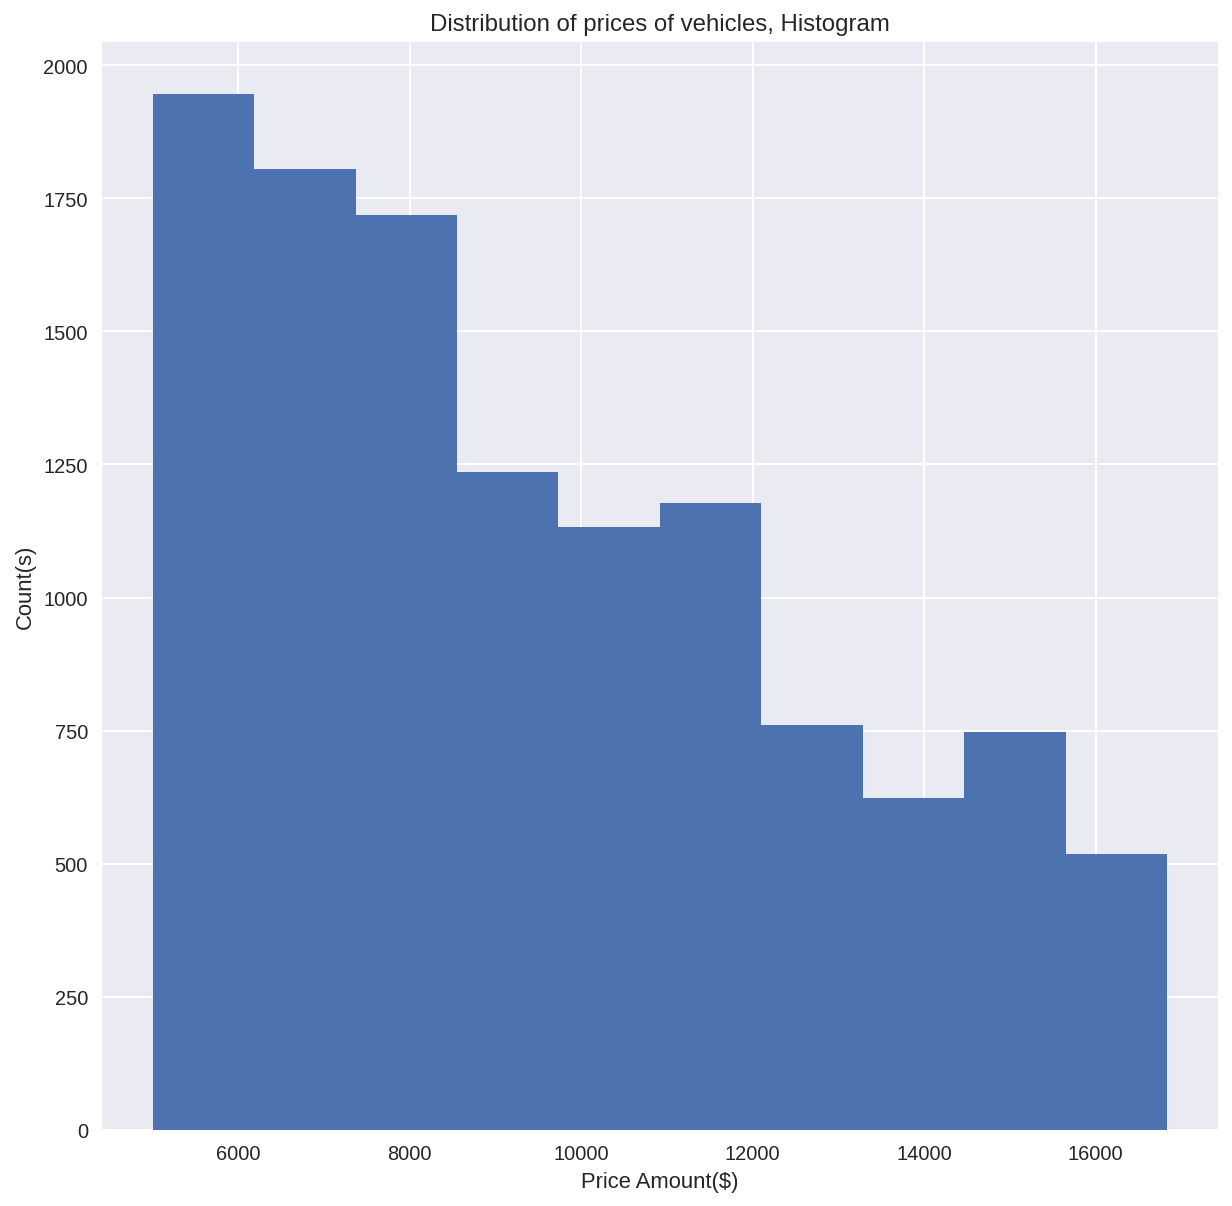

In [49]:
#price
print(data_not_outliers.price.describe())
q1=data_not_outliers.price.quantile(0.25)
q3=data_not_outliers.price.quantile(0.75)
iqr=q3-q1

print(data_not_outliers.boxplot('price', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data_not_outliers.price.min(), xmin=0.9,xmax=1.1, color='green')
plt.hlines(y=data_not_outliers.price.max(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of prices of vehicles, Boxplot')
plt.ylabel('Price Amount ($)')
plt.xlabel('Price parameter')

print(data_not_outliers.hist('price', figsize=(10,10)))
plt.title('Distribution of prices of vehicles, Histogram')
plt.xlabel('Price Amount($)')
plt.ylabel('Count(s)')

#percent change of std witout ouliers from raw data
print('percent change of std witout outliers: ',
      round((np.std(data_not_outliers.price)
             -np.std(data.price))*100/np.std(data.price), 2),"%")
plt.show()

### core parameter: vehicle_age
The values of __vehicle_age__ without outliers presented a negative skewed distribution with a mean of 7.92 years, median value of 8.00 years, and a standard deviation of 2.29 years. Removing the outliers decreased the standard deviantion by 62.59 % from the raw data. 

count    11663.000000
mean         7.922318
std          2.289044
min          4.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: vehicle_age, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


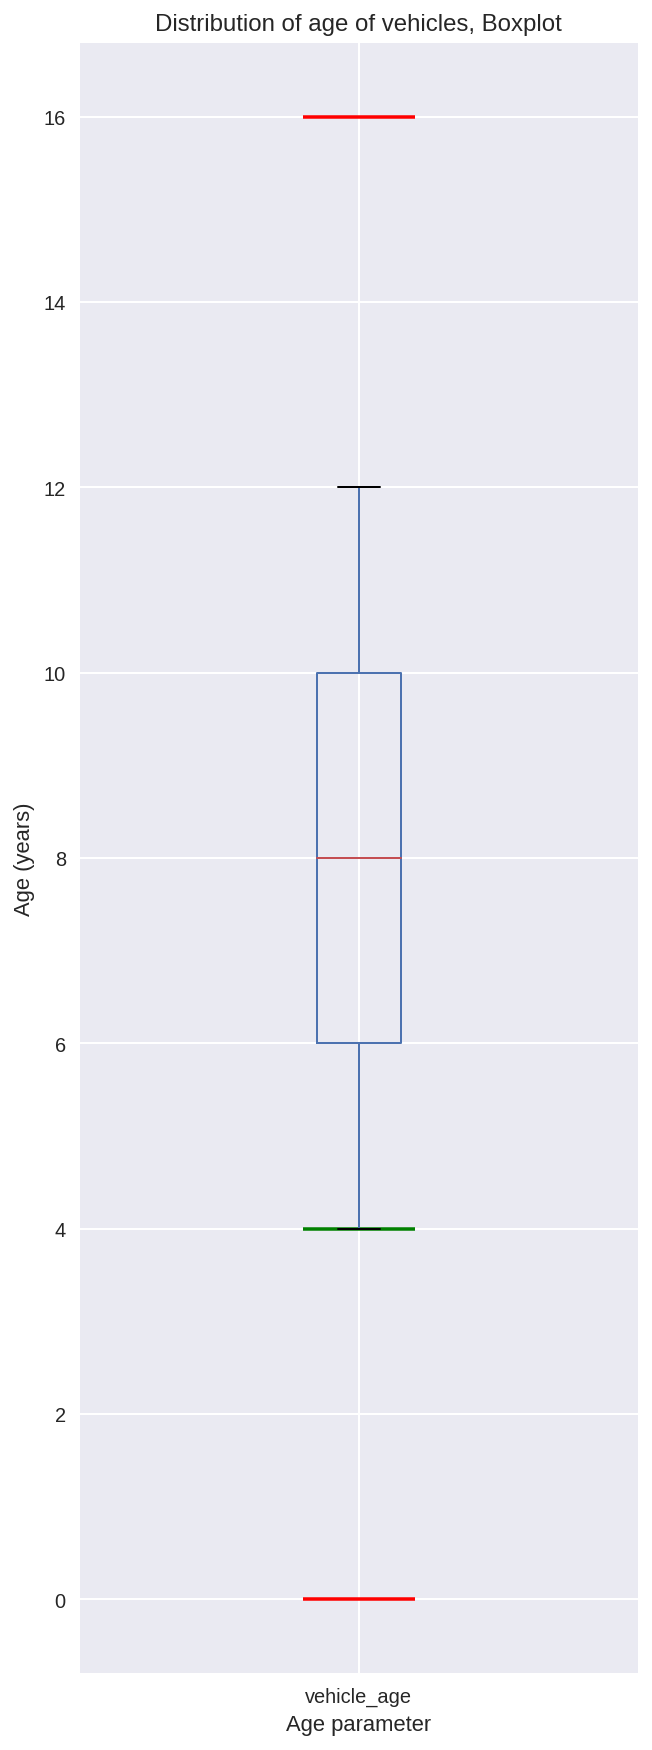

[[<AxesSubplot:title={'center':'vehicle_age'}>]]


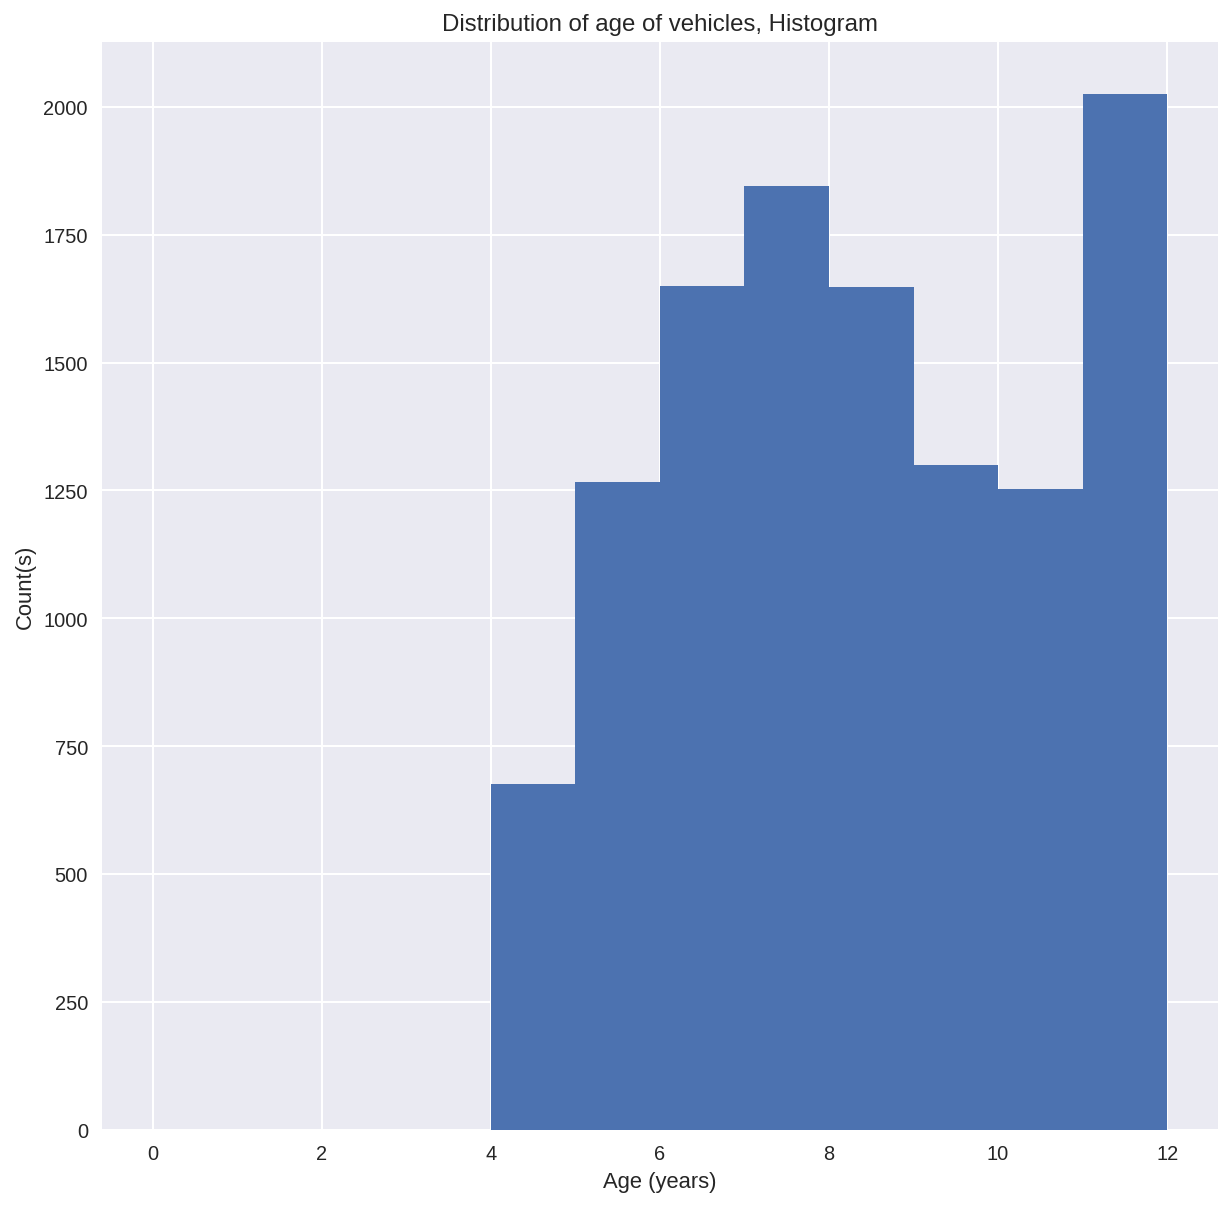

percent change of std witout outliers:  -62.59 %


In [50]:
#age
print(data_not_outliers.vehicle_age.describe())
q1=data_not_outliers.vehicle_age.quantile(0.25)
q3=data_not_outliers.vehicle_age.quantile(0.75)
iqr=q3-q1

print(data_not_outliers.boxplot('vehicle_age', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data_not_outliers.vehicle_age.min(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of age of vehicles, Boxplot')
plt.ylabel('Age (years)')
plt.xlabel('Age parameter')
plt.show()
print(data_not_outliers.hist('vehicle_age',range=(0,12), figsize=(10,10), bins=12))
plt.title('Distribution of age of vehicles, Histogram')
plt.ylabel('Count(s)')
plt.xlabel('Age (years)')
plt.show()
#percent change of standard deviation from raw data 
print('percent change of std witout outliers: ',
      round((np.std(data_not_outliers.vehicle_age)
      -np.std(data.vehicle_age))*100/np.std(data.vehicle_age), 2),"%")


### core parameter: avg_miles_per_year
The values of __avg_miles_per_year__ without outliers presented a psotive skewed distribution with a mean of 15,879.67 miles per year, median value of 15714.29 miles per year, and a standard deviation of 2,825.54 miles per year. Removing the outliers decreased the standard deviantion by 88.55 % from the raw data. 

count    11663.000000
mean     15879.670275
std       2825.548353
min      10957.140000
25%      13500.000000
50%      15714.290000
75%      18140.000000
max      21601.600000
Name: avg_miles_per_year, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'avg_miles_per_year'}>]]
percent change of std witout outliers:  -85.55 %


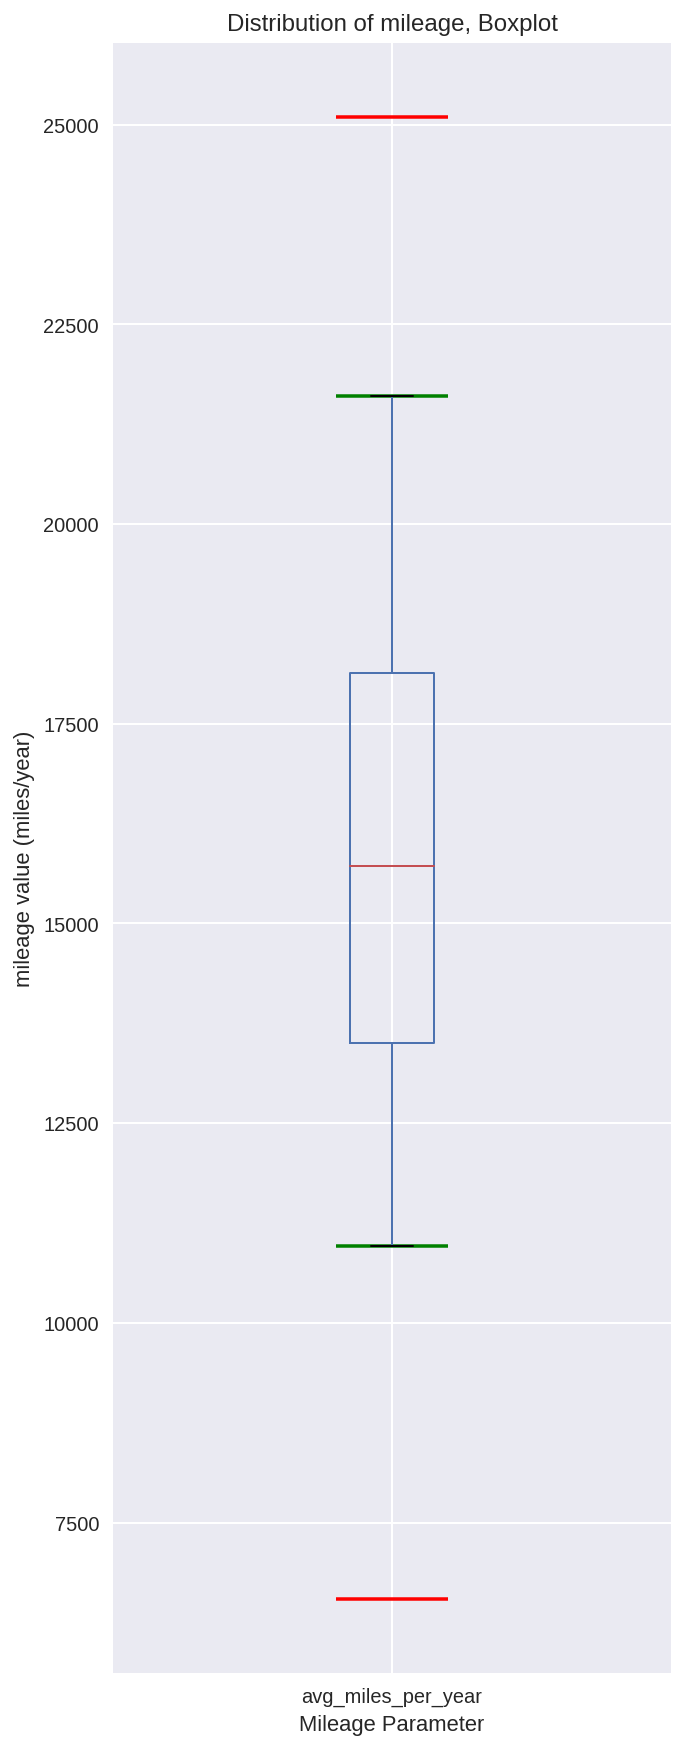

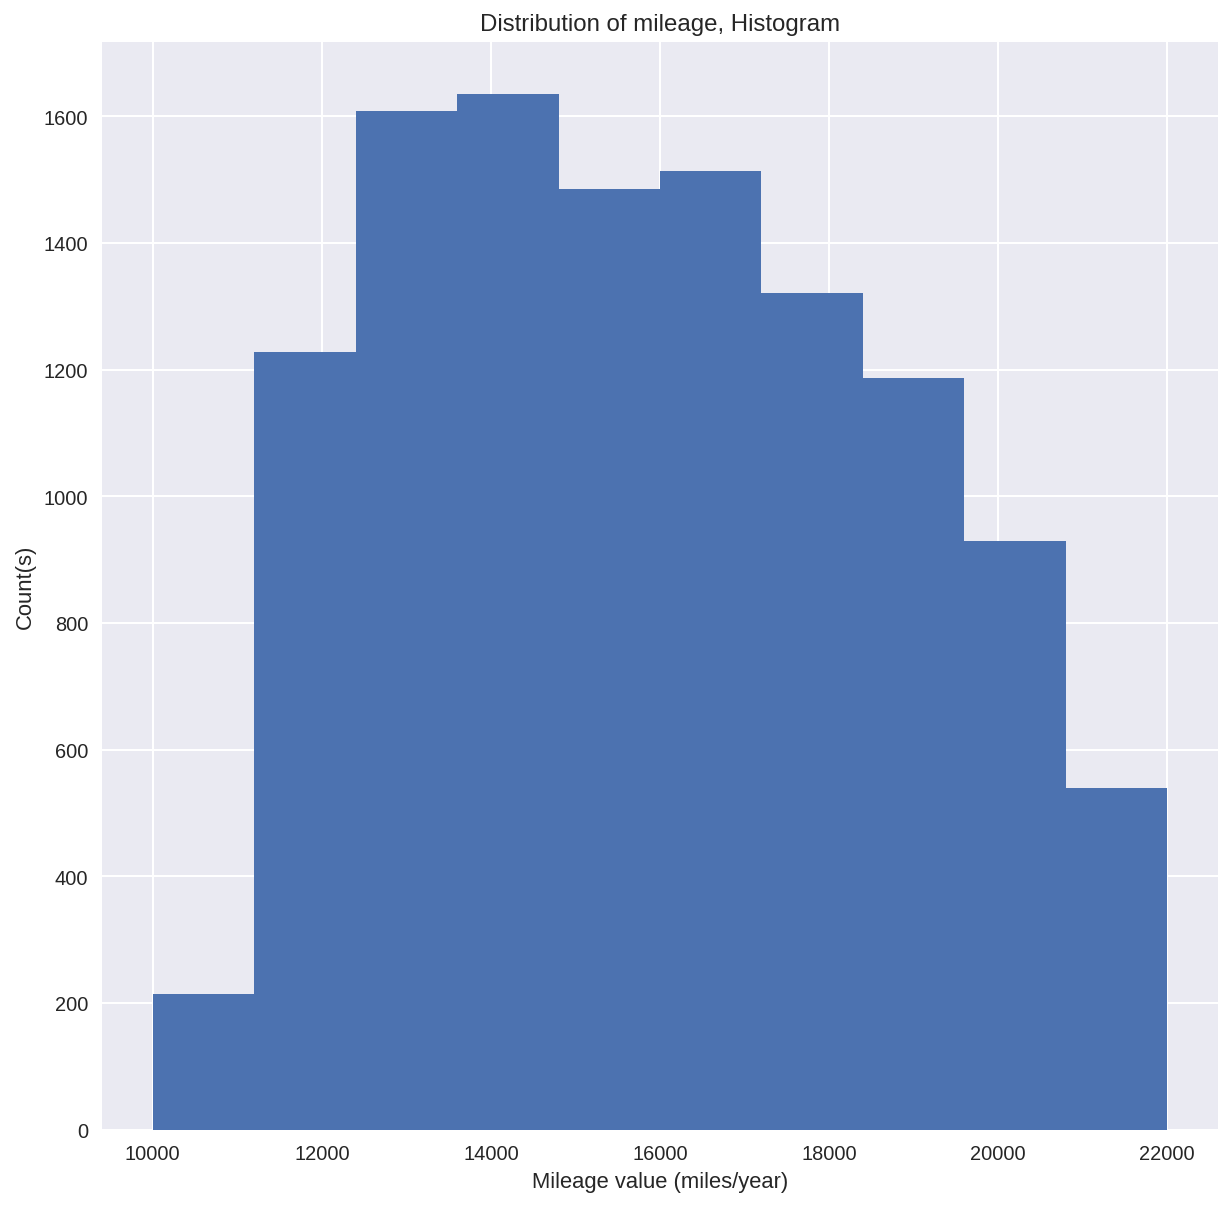

In [51]:
#mileage

print(data_not_outliers.avg_miles_per_year.describe())
q1=data_not_outliers.avg_miles_per_year.quantile(0.25)
q3=data_not_outliers.avg_miles_per_year.quantile(0.75)
iqr=q3-q1

print(data_not_outliers.boxplot('avg_miles_per_year', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data_not_outliers.avg_miles_per_year.min(), xmin=0.9,xmax=1.1, color='green')
plt.hlines(y=data_not_outliers.avg_miles_per_year.max(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of mileage, Boxplot')
plt.xlabel('Mileage Parameter')
plt.ylabel('mileage value (miles/year)')

print(data_not_outliers.hist('avg_miles_per_year', range=(10000,22000), figsize=(10,10)))
plt.title('Distribution of mileage, Histogram')
plt.ylabel('Count(s)')
plt.xlabel('Mileage value (miles/year)')

#percent change of standard deviation from raw data 
print('percent change of std witout outliers: ',
      round((np.std(data_not_outliers.avg_miles_per_year)
             -np.std(data.avg_miles_per_year))*100/np.std(data.avg_miles_per_year), 2),"%")
plt.show()

### core parameter: cylinders
The values of __cylinders__ without outliers presented a positive skewed distribution with a mean of 5.84 cylinders, median value of 6 cylinders, and a standard deviation of 1.52 cylinders. Removing the outliers decreased the standard deviantion by 3.75 % from the raw data. 

count    11663.000000
mean         5.838721
std          1.520275
min          4.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: cylinders, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'cylinders'}>]]
percent change of std witout outliers:  -3.75 %


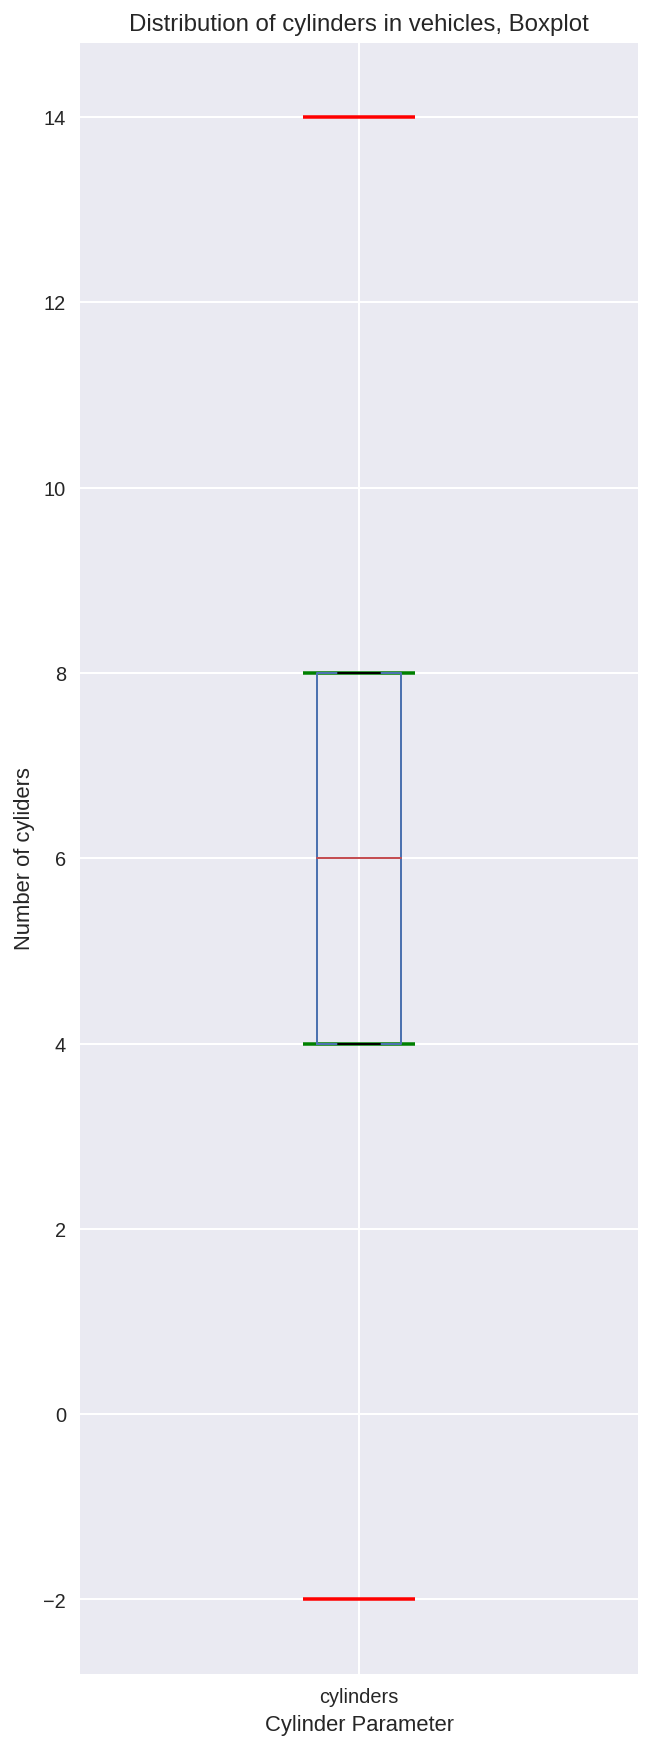

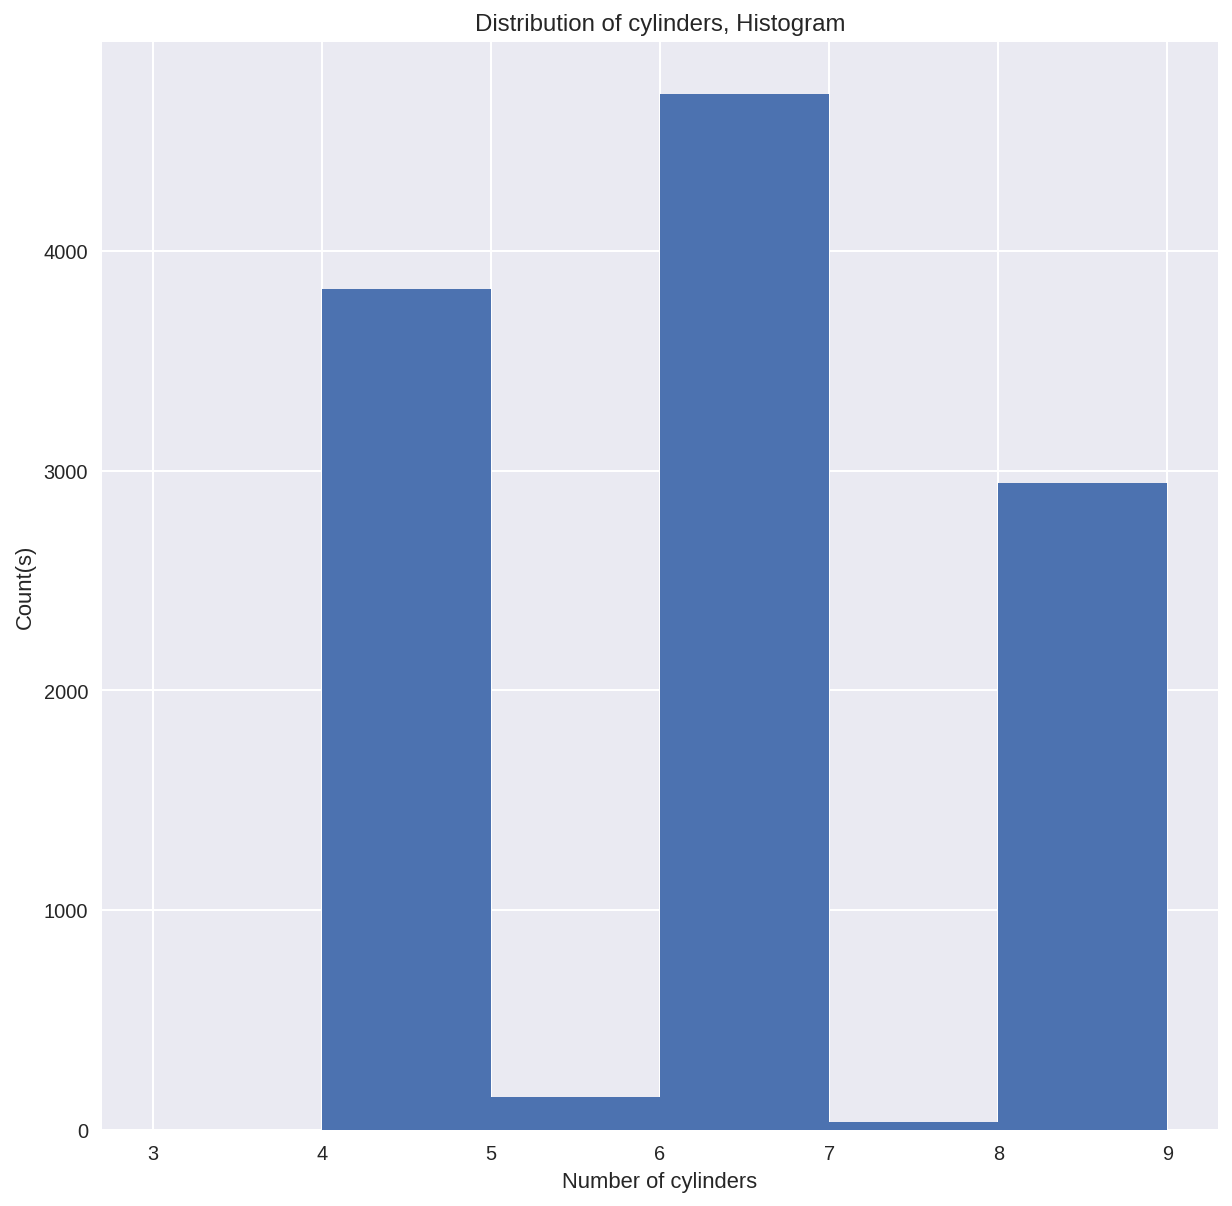

In [52]:
#number of cylinders
print(data_not_outliers.cylinders.describe())
q1=data_not_outliers.cylinders.quantile(0.25)
q3=data_not_outliers.cylinders.quantile(0.75)
iqr=q3-q1

print(data_not_outliers.boxplot('cylinders', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data_not_outliers.cylinders.min(), xmin=0.9,xmax=1.1, color='green')
plt.hlines(y=data_not_outliers.cylinders.max(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of cylinders in vehicles, Boxplot')
plt.xlabel('Cylinder Parameter')
plt.ylabel('Number of cyliders')

print(data_not_outliers.hist('cylinders', range=(3,9), bins=[3,4,5,6,7,8,9], figsize=(10,10)))
plt.title('Distribution of cylinders, Histogram')
plt.ylabel('Count(s)')
plt.xlabel('Number of cylinders')

#percent change of standard deviation from raw data 
print('percent change of std witout outliers: ',round((np.std(data_not_outliers.cylinders)-np.std(data.cylinders))*100/np.std(data.cylinders), 2),"%")
plt.show()

### core parameter: condition
The values of condition counts without outliers presented a postive skewed distribution with a mean of 1943.83 counts, median value of 416.00 counts, and a standard deviation of 2780.28 counts. Removing the outliers decreased the standard deviantion by 74.67 % from the raw data. 

count    51513.000000
mean         3.637490
std          0.711765
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: condition, dtype: float64


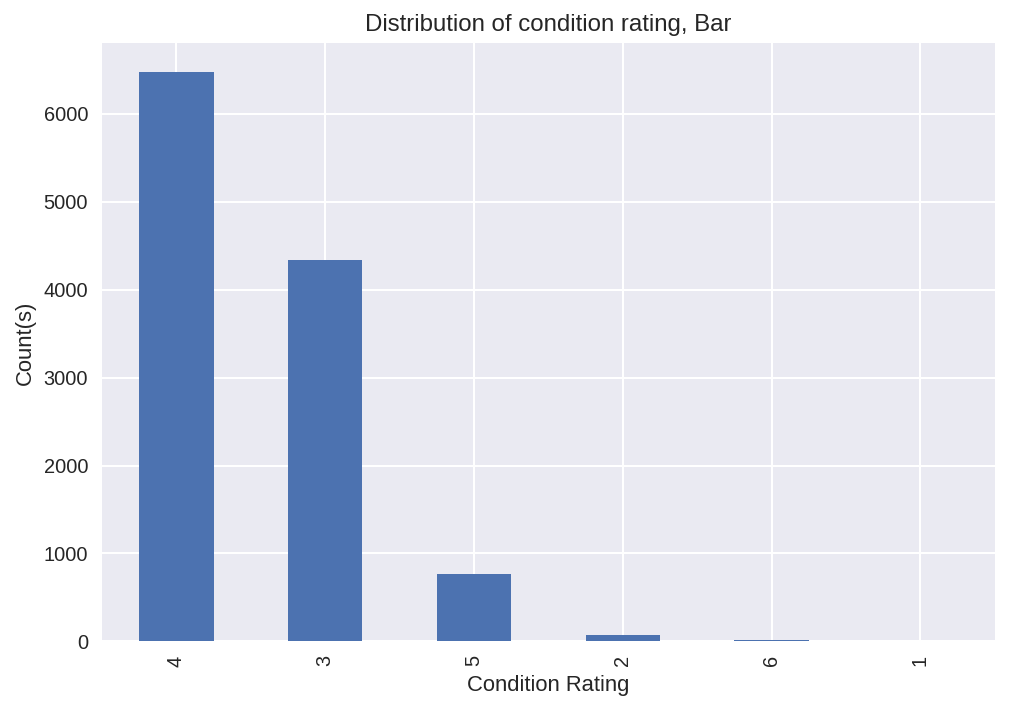

In [53]:
#condition
print(data.condition.describe())

data_not_outliers['condition'].value_counts(ascending=False).plot(kind='bar')
plt.title('Distribution of condition rating, Bar')
plt.xlabel('Condition Rating')
plt.ylabel('Count(s)')
plt.show()

count       6.000000
mean     1943.833333
std      2780.284476
min         8.000000
25%        26.500000
50%       416.000000
75%      3441.000000
max      6477.000000
dtype: float64
percent change of std witout outliers:  -74.67 %


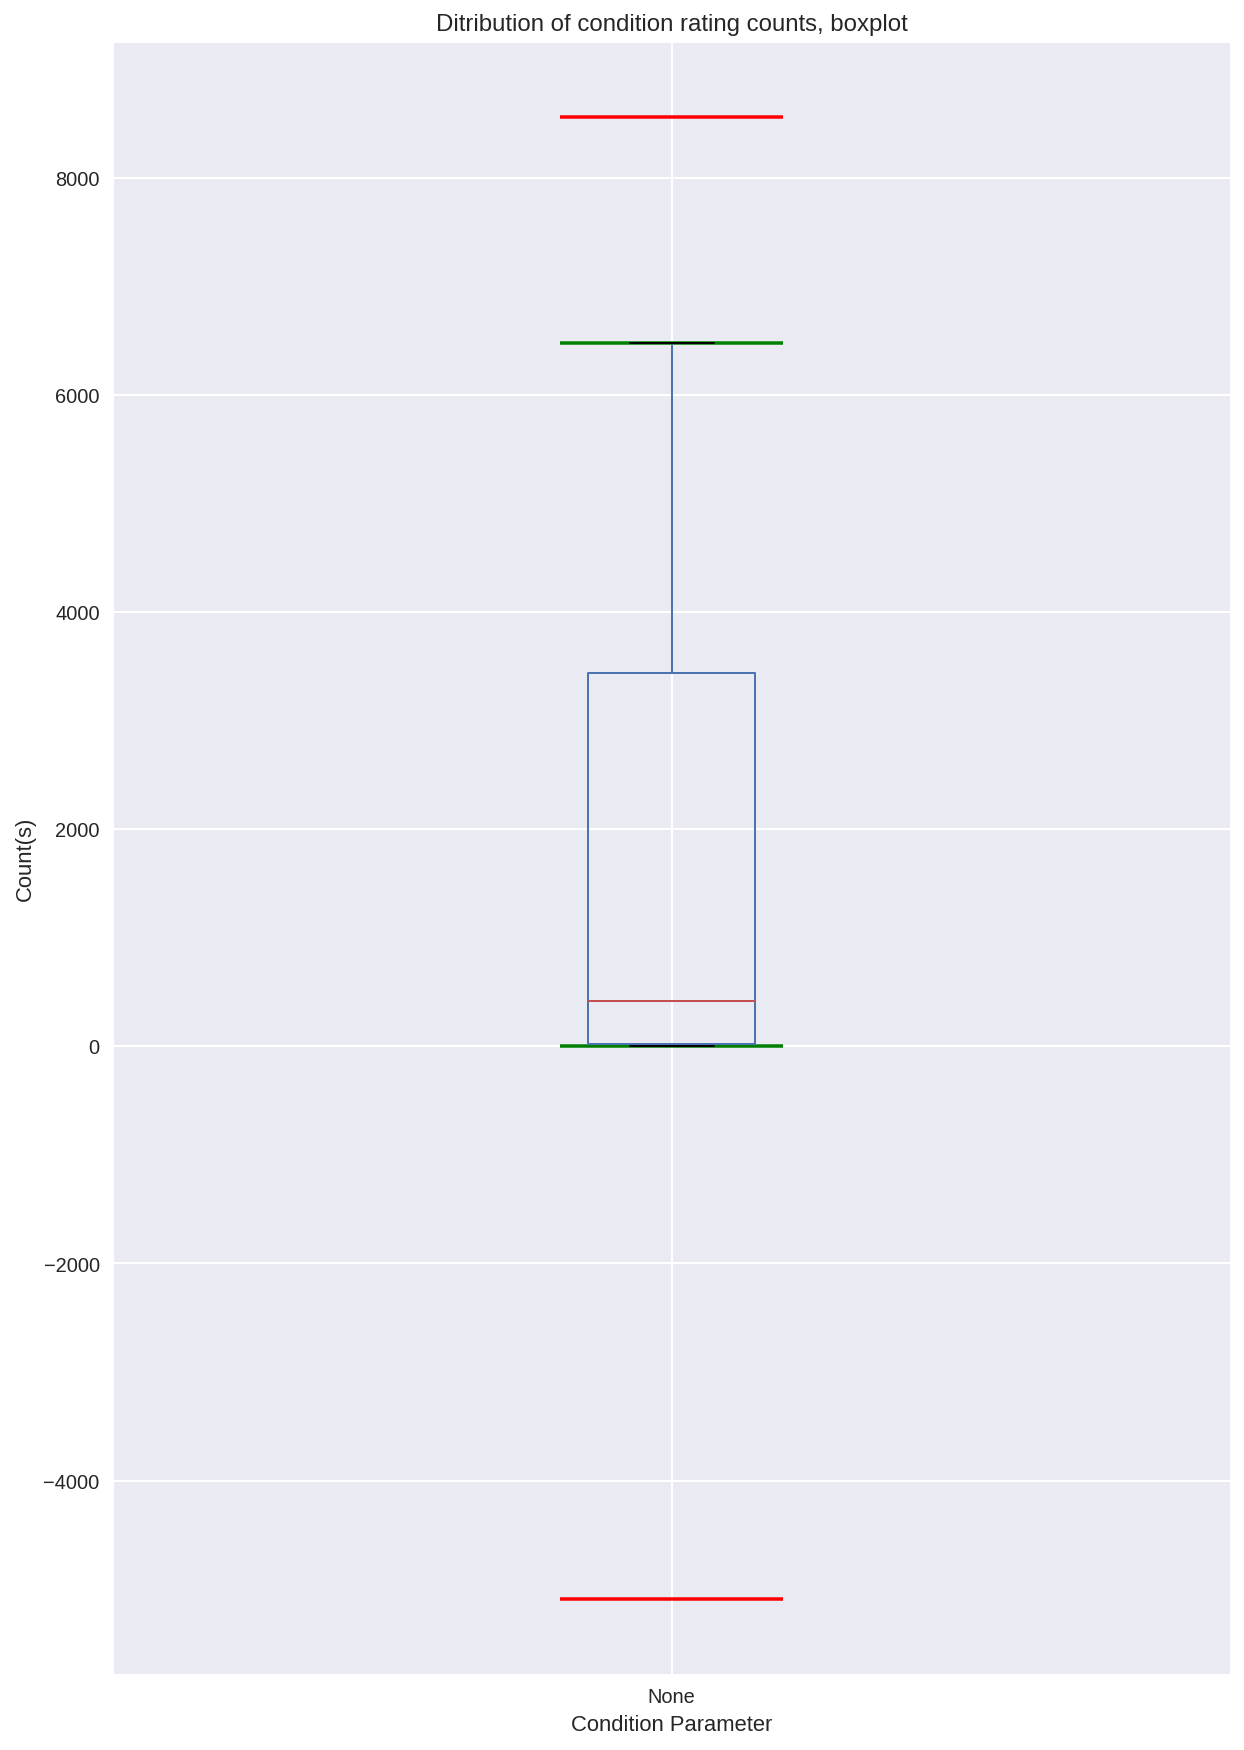

In [54]:
not_outlier_condition_counts=data_not_outliers.pivot_table(index='condition' ,aggfunc='size')
print(not_outlier_condition_counts.describe())
q1=not_outlier_condition_counts.quantile(0.25)
q3=not_outlier_condition_counts.quantile(0.75)
iqr=q3-q1

data_not_outliers.pivot_table(index='condition' ,aggfunc='size').plot(kind='box', figsize=(10,15))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=not_outlier_condition_counts.min(), xmin=0.9,xmax=1.1, color='green')
plt.hlines(y=not_outlier_condition_counts.max(), xmin=0.9,xmax=1.1, color='green')
plt.xlabel('Condition Parameter')
plt.ylabel('Count(s)')
plt.title('Ditribution of condition rating counts, boxplot')
print('percent change of std witout outliers: ',round((np.std(not_outlier_condition_counts)
                                                       -np.std(condition_counts))*100/np.std(condition_counts), 2),"%")
plt.show()

## Ads lifetime



The distribution for days listed of an ad had a mean value of of 39.44 days, a median value of 33.00 days, and a standard deviation of 28.55 days. The distribution was positve skewed and presented outliers greather than 1.5 IQR. The range of days between 0 and 104 days was determined as a typical lifetime of an ad. Anything greater than 104 days was considered an anomalie long time to remove an ad

count    11663.000000
mean        39.446112
std         28.551286
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'days_listed'}>]]
lower range 1.5 IQR:  -32.0
greater range 1.5 IQR:  104.0


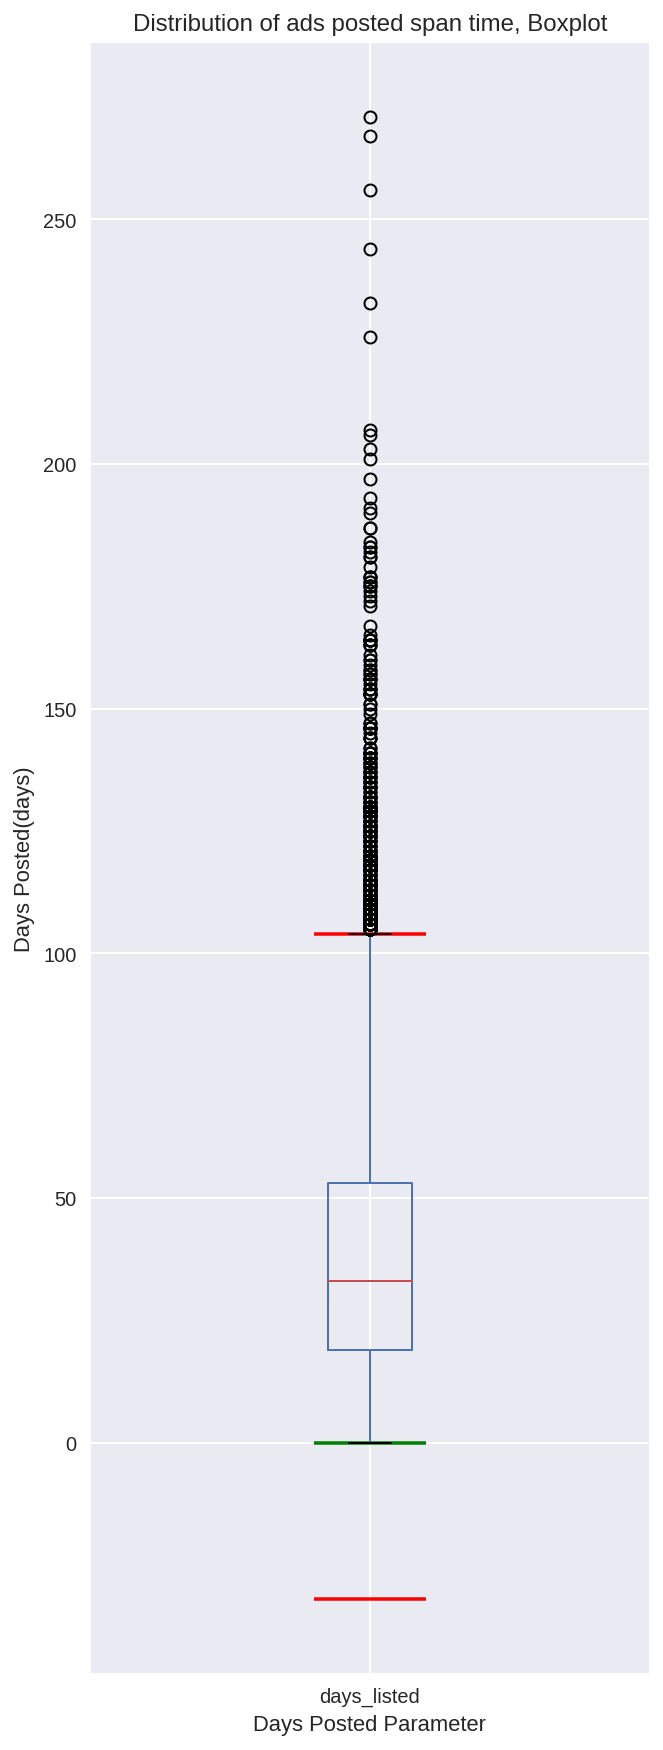

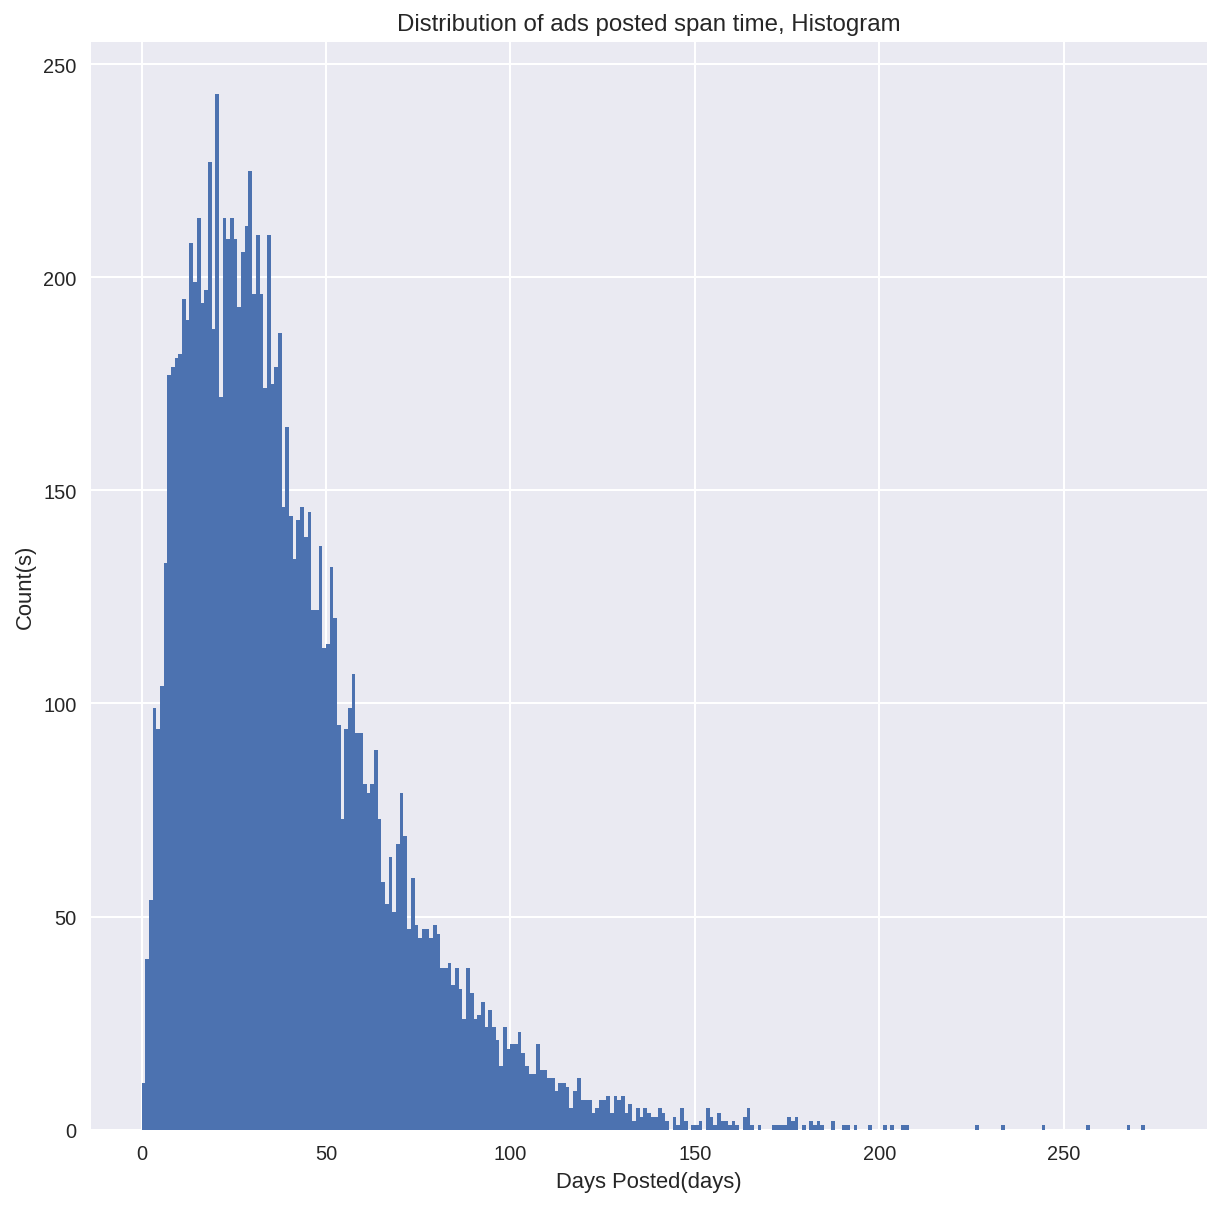

In [55]:
print(data_not_outliers.days_listed.describe())
q1=data_not_outliers.days_listed.quantile(0.25)
q3=data_not_outliers.days_listed.quantile(0.75)
iqr=q3-q1

print(data_not_outliers.boxplot('days_listed', figsize=(5,15)))
plt.hlines(y=q3+1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=q1-1.5*iqr, xmin=0.9,xmax=1.1, color='red')
plt.hlines(y=data_not_outliers.days_listed.min(), xmin=0.9,xmax=1.1, color='green')
plt.title('Distribution of ads posted span time, Boxplot')
plt.xlabel('Days Posted Parameter')
plt.ylabel('Days Posted(days)')

print(data_not_outliers.hist('days_listed', range=(0,275),bins=275, figsize=(10,10)))
plt.title('Distribution of ads posted span time, Histogram')
plt.ylabel('Count(s)')
plt.xlabel('Days Posted(days)')

#range between q1-1.5*iqr and q3+1.5*iqr
print('lower range 1.5 IQR: ',q1-1.5*iqr)
print('greater range 1.5 IQR: ',q3+1.5*iqr)
plt.show()

There were no outlier that were removed too quickly. The lower 1.5 IQR range was -32.00 days and negative values for days do not make sense in this context. 

In [56]:

q1=data_not_outliers.days_listed.quantile(0.25)
q3=data_not_outliers.days_listed.quantile(0.75)
iqr=q3-q1

days_upper=q3+1.5*iqr
days_lower=q1-1.5*iqr
quickly_removed=data_not_outliers.query('@days_lower > days_listed')
quickly_removed

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_miles_per_year


There were a total of 371 ads that had a lifetime greater than 104 days and were considered as an anamolie. The distribution of the ads that were greater than 1.5 IQR had a positive skewed distribution, with a mean value of 130.29 days, median value of 121 days, and a standard deviation of 27.22 days. 

count    371.000000
mean     130.293801
std       27.220371
min      105.000000
25%      111.000000
50%      121.000000
75%      139.000000
max      271.000000
Name: days_listed, dtype: float64


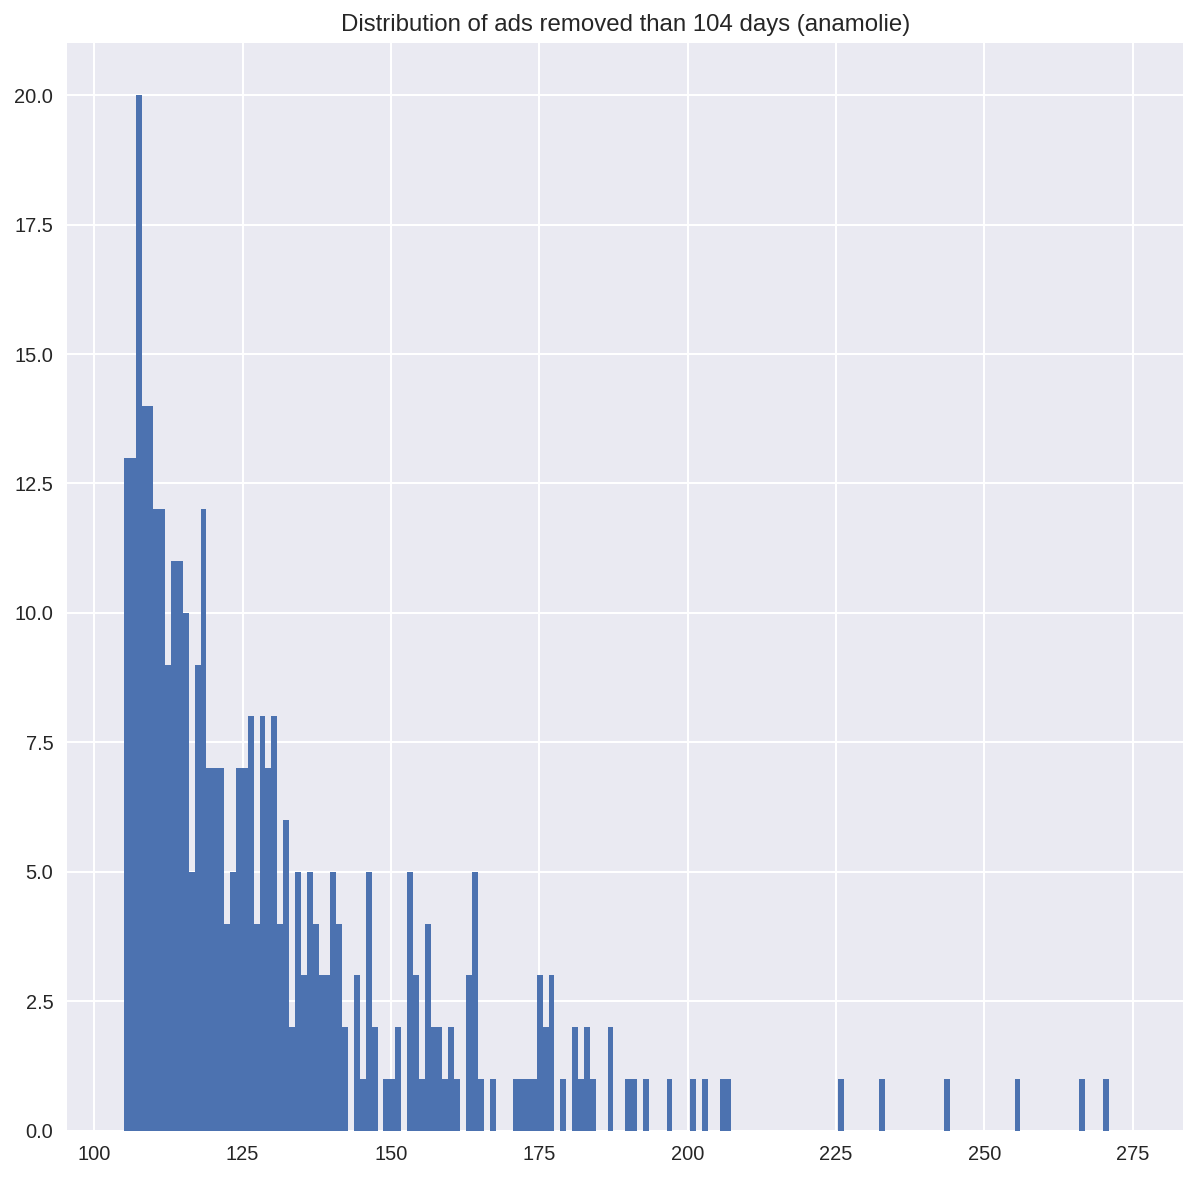

In [57]:
q1=data_not_outliers.days_listed.quantile(0.25)
q3=data_not_outliers.days_listed.quantile(0.75)
iqr=q3-q1

days_upper=q3+1.5*iqr
days_lower=q1-1.5*iqr
too_long_removed=data_not_outliers.query('@days_upper < days_listed')
print(too_long_removed.days_listed.describe())
too_long_removed.hist('days_listed', range=(104,275),bins=172, figsize=(10,10))
plt.title('Distribution of ads removed than 104 days (anamolie)')
plt.show()

## Average price per each type of vehicle



This section was used to analize the number of ads and the average price for each vehicle type. The table `price_ad_type` summarizes the average price of vehicle and the number of ads per vehicle type. The top 5 vehicles with the highest average price were __offroad, truck, pickup, convertible, and coupe__, with average prices of 12044.73 USD, 11482.25 USD, 11073.41 USD, 10795.70 USD, and 9724.59 USD, respectively. The top 5 vehicles with the highest number of ads were __SUV, sedan, truck, pickup, and wagon__ with ad count values of 3636 ads, 3080 ads, 2104 ads, 1134 ads, and 493 ads, respectively. The relationship between average price and number of ads was summarized in the scatter plot `ads_type_plot`, which presented a correlation coefficient of 0.027. This concludes that the relationship between average price and number of ads has is a weak, positive relationship. The two vehicle types selected for the following analysis were __SUV ad sedan__ because they had the greatest number of ads. 

             average_price   ads
type                            
SUV            9646.641914  3636
sedan          7875.447403  3080
truck         11482.254753  2104
pickup        11073.419753  1134
wagon          9048.882353   493
mini-van       8554.600000   330
coupe          9724.587097   310
hatchback      7561.212996   277
van            8749.150602   166
other          9288.482759    58
convertible   10795.709091    55
offroad       12044.736842    19
bus            7500.000000     1


correlation of number of ads per average cost 0.027073618390874077


AxesSubplot(0.125,0.125;0.775x0.755)


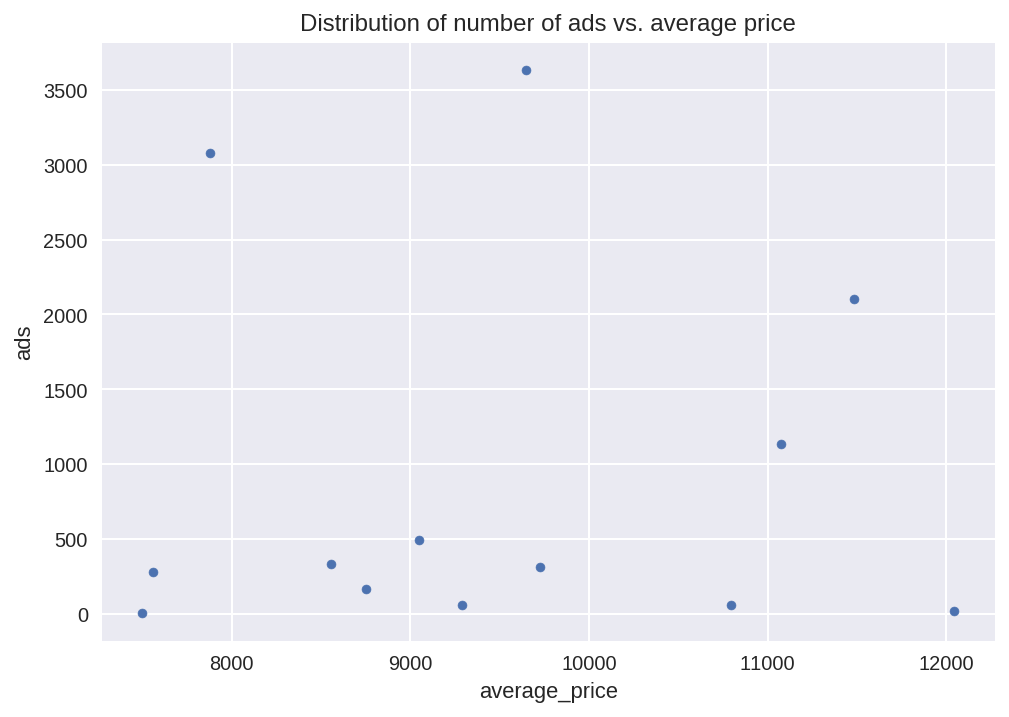

In [58]:
price_ad_type=data_not_outliers.pivot_table(index='type',values='price', aggfunc=['mean','count'])
price_ad_type.columns=['average_price', 'ads']
print(price_ad_type.sort_values('ads', ascending=False))

ads_type_plot=price_ad_type.plot(x='average_price', y='ads', kind='scatter')

print()
print ()
correl_price_ads=price_ad_type['average_price'].corr(price_ad_type['ads'])
print('correlation of number of ads per average cost', correl_price_ads)
print()
print ()
print(ads_type_plot)
plt.title('Distribution of number of ads vs. average price')
plt.show()

The __ads_vehicle_type__ graph summarizes the dependence of number of ads on vehicle type. The top 5 vehicles with the highest number of ads were __SUV, sedan, truck, pickup, and wagon__ with ad count values of 3636 ads, 3080 ads, 2104 ads, 1134 ads, and 493 ads, respectively. 

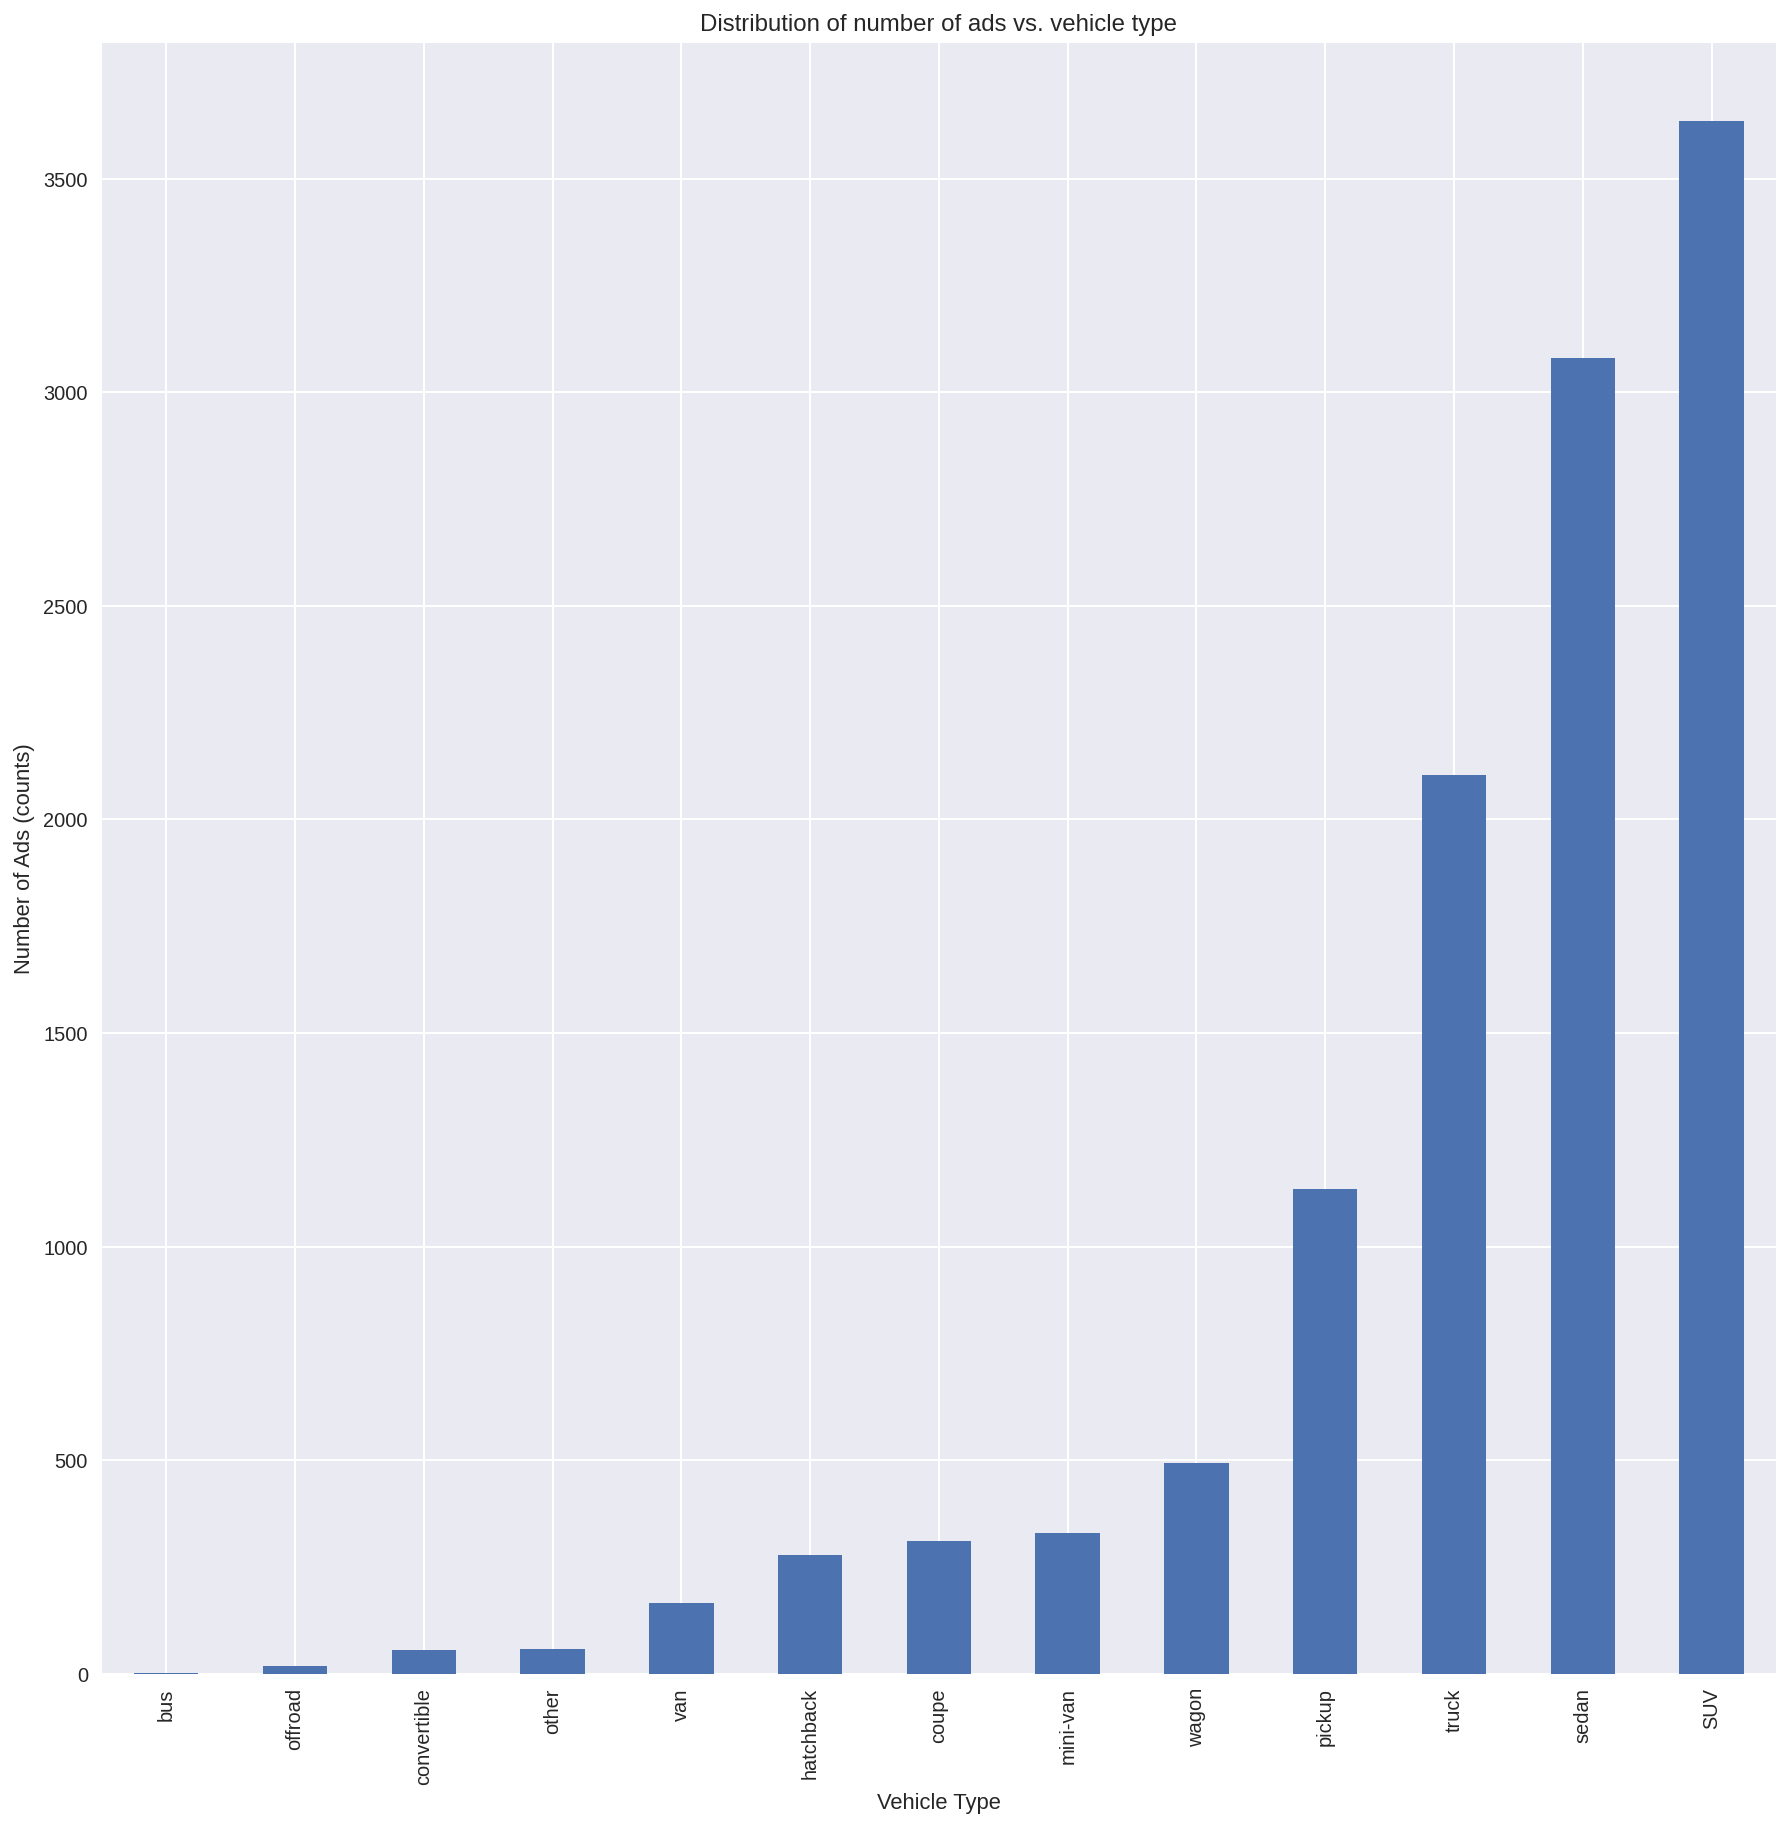

In [59]:
ads_vehicle_type=data_not_outliers.pivot_table(index='type',
                                               aggfunc='size').sort_values( ascending=True).plot(kind='bar', figsize=(15,15))
plt.ylabel('Number of Ads (counts)')
plt.xlabel('Vehicle Type')
plt.title('Distribution of number of ads vs. vehicle type')
plt.show()

## Price factors

This section was used to determine what factor(s) impact the price of vehicles with the 2 greatest number of ads: __SUVs and Sedans__. The table `greatest_ads_data` was used a correlation matrix and correlation plots, shown below. The correlation matrix and the correlation plots summarized the relationship between price and the factors: __age, mileage__. The correlation plots conclude that the price and the vehicle age have a correlation coefficient of -0.29, which means that there is is weak, negative  relationship between the price of a vehicle and price. The correlations coefficient for mileage and price was 0.038, which is also a weak, positive relationsip between mileage and price, and weaker than the relationship between age and price. 

In [60]:
#creating tables with only vehicle types: SUV and sedan, for further analysis on price factors
greatest_ads_data=data_not_outliers.query('type== "SUV" or type=="sedan"')
greatest_ads_data_quant=greatest_ads_data.loc[:,['price','vehicle_age','avg_miles_per_year']]
greatest_ads_data_qual=greatest_ads_data.loc[:,['price','paint_color','transmission', 'condition']]

                       price  vehicle_age  avg_miles_per_year
price               1.000000    -0.290405            0.038063
vehicle_age        -0.290405     1.000000           -0.419828
avg_miles_per_year  0.038063    -0.419828            1.000000


Distribution of price, vehicle_age, and avg_miles_per_year in scatter matrix


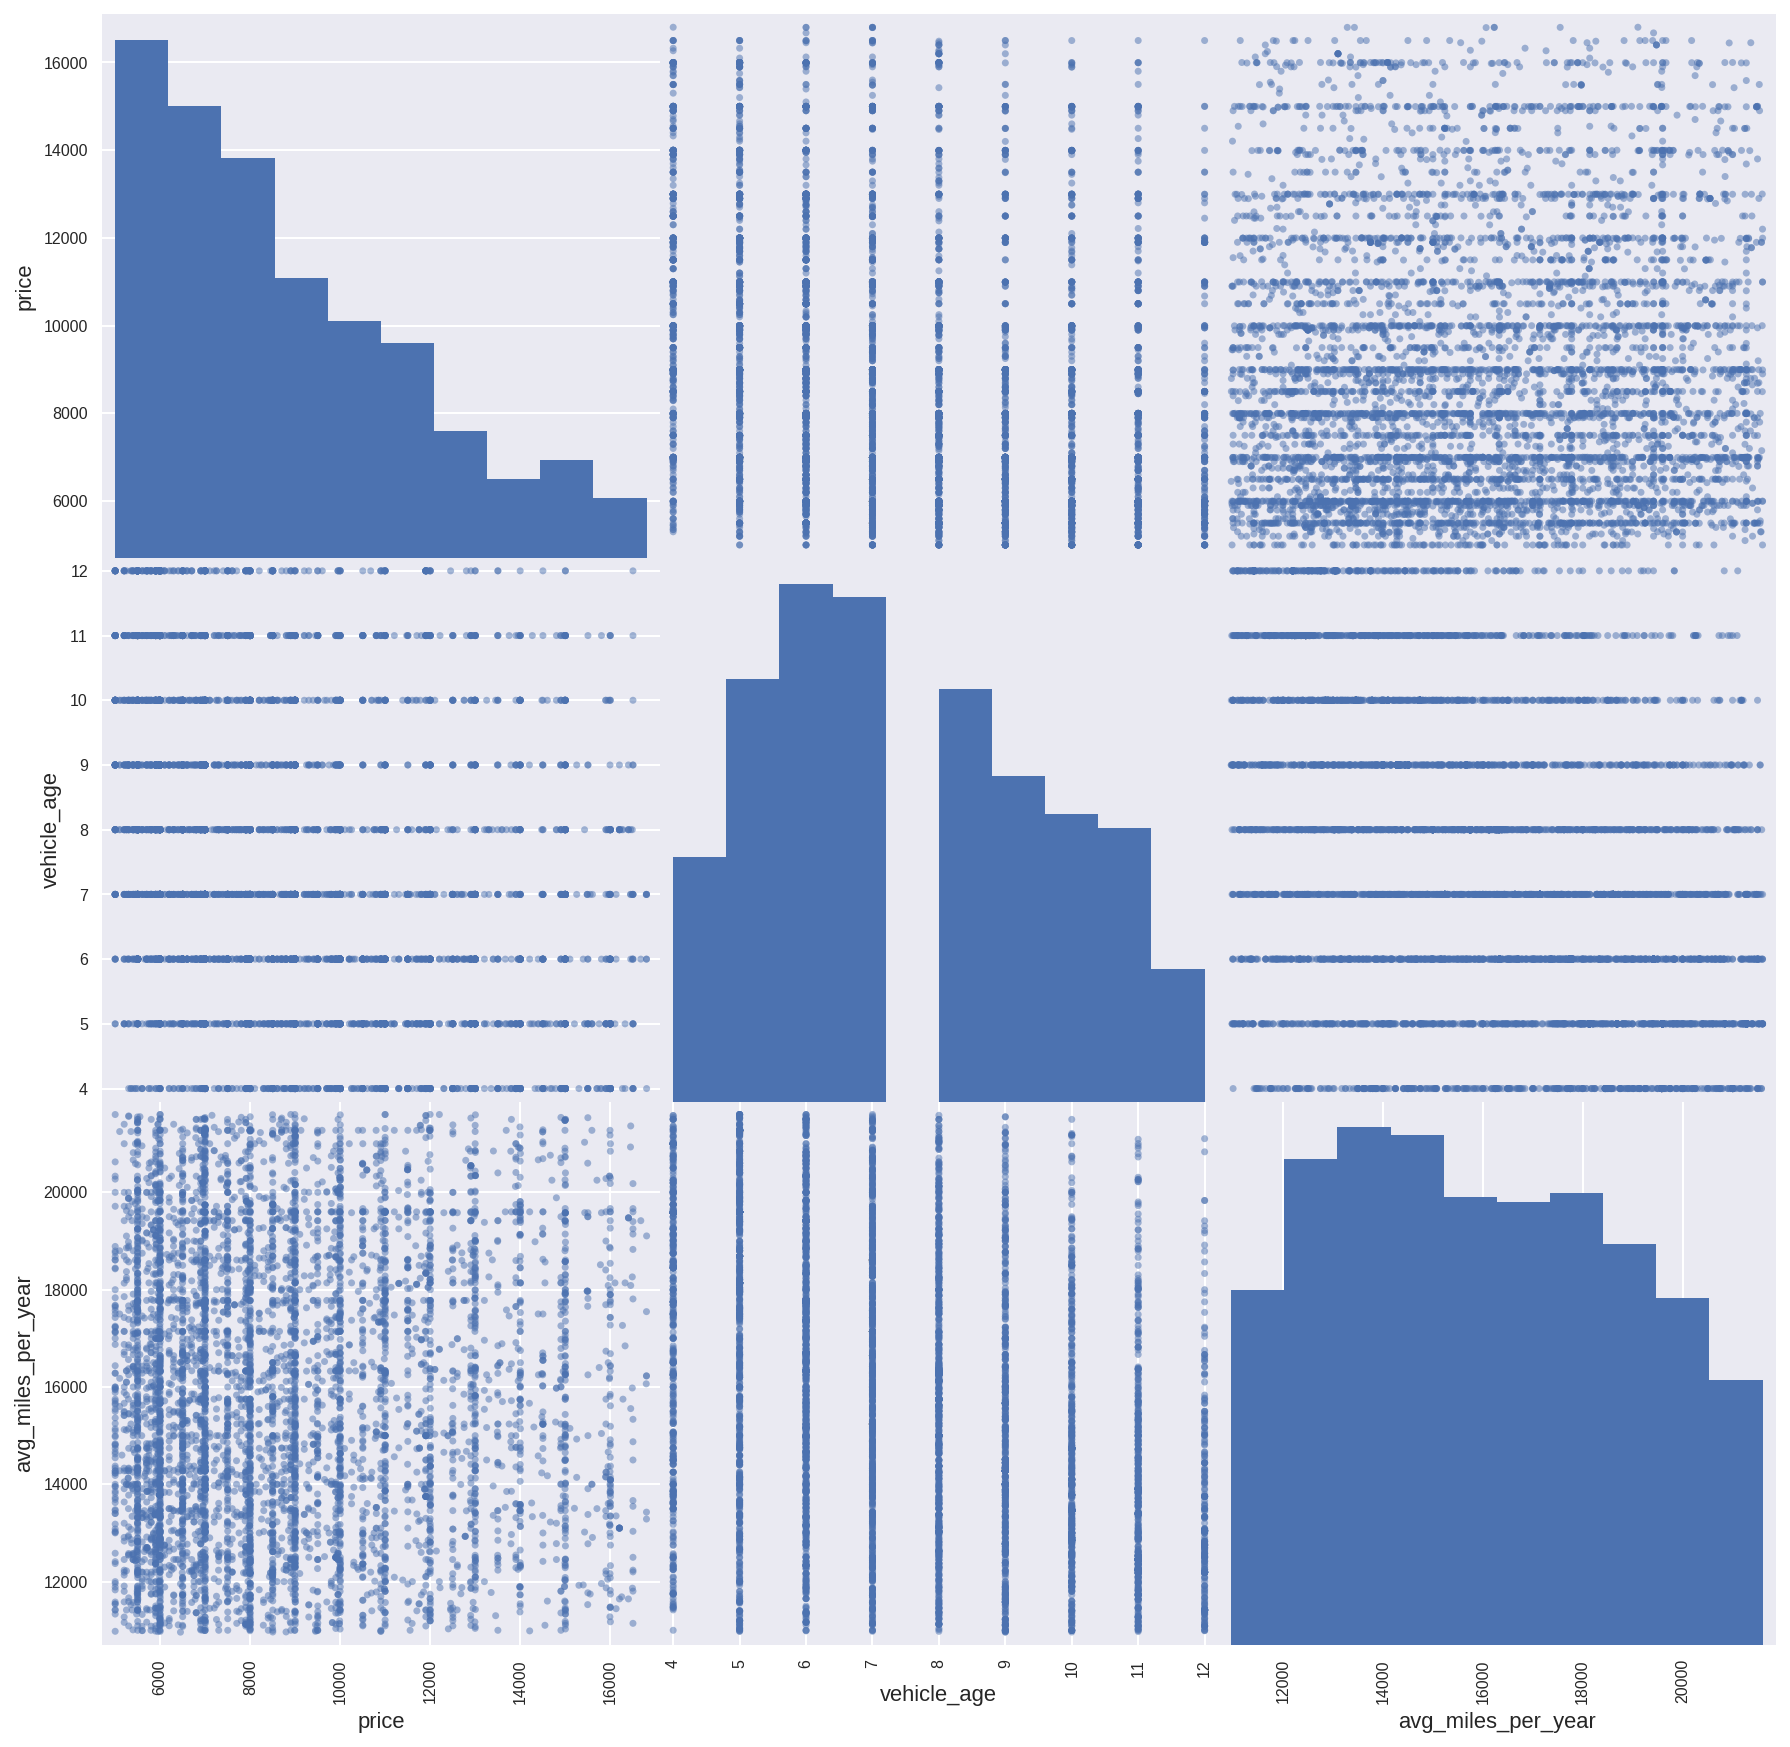

In [61]:

print(greatest_ads_data_quant.corr())
print()
print()
pd.plotting.scatter_matrix(greatest_ads_data_quant, figsize=(15,15))
print('Distribution of price, vehicle_age, and avg_miles_per_year in scatter matrix')
plt.show()

### Condition factor
The `condition` factor was plotted in a boxplot comparing condition rating category and price. The top 2 rating categories that had the greatest means were 5 and 4, with values of 9276.29 USD, and 9056.99 USD, respectively. We omitted the rating categories with less than 50 ads: categories 1,2, and 6. However, the top 2 rating categories that had the greatest means, also presented the greatest standard deviation values for price. Raing category 5 had a standard deviation of 3133.22 USD; raing category 4 had a standard deviation of 2876.00 USD; while rating 3 had the smallest mean out of the categories, with ad counts greater than 50, raing category 3 had a standard deviation of 2754.59 USD . The greatest value for price was for a vehicle with rating catefory of 4, with a value of 16803 and it was not an outlier greater than 1.5 IQR for rating category 4.  

In [62]:
condition_price=greatest_ads_data_qual.pivot_table(
    index='condition', aggfunc= 'size').sort_values(ascending=False)
condition_price

condition
4    3905
3    2264
5     514
2      20
6      10
1       3
dtype: int64

Text(0.5, 1.0, 'Distribution of price vs. condition')

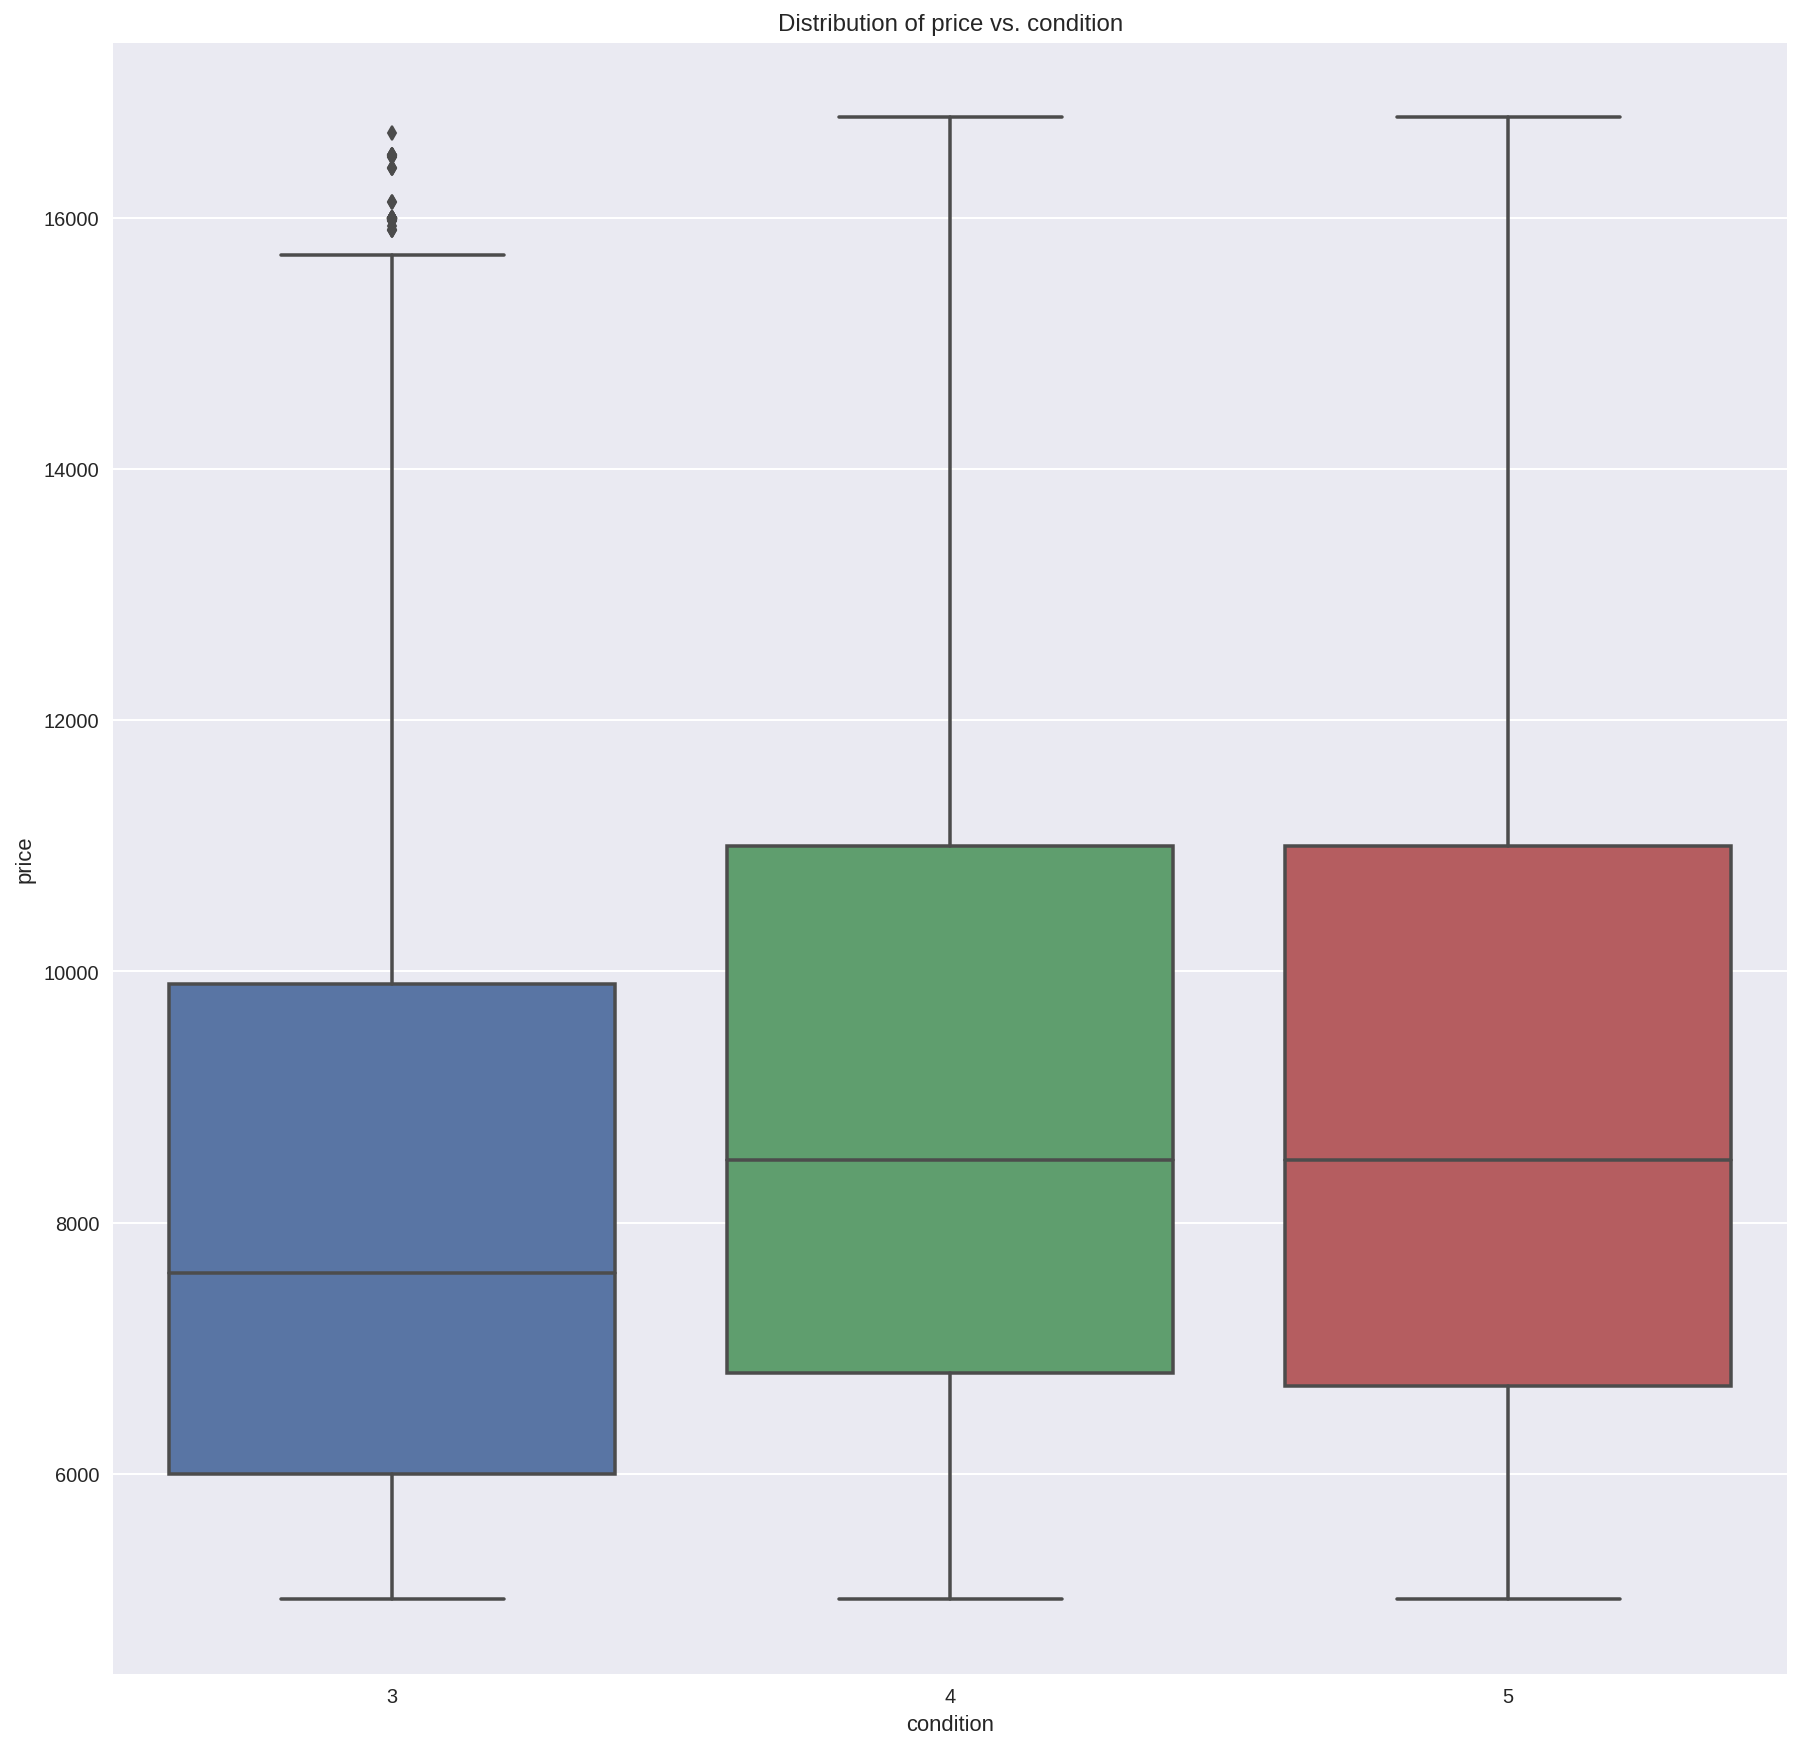

In [63]:
#condition
fig, ax = plt.subplots(figsize=(15, 15))
plot=sns.boxplot(x='condition', y='price', 
                 data=greatest_ads_data_qual.query('condition != 1 and condition!=6 and condition!=2'), ax=ax)

condition_price=greatest_ads_data_qual.query('condition != 1 and condition!=6 and condition!=2').pivot_table(
    index='condition',values='price', aggfunc=['min','mean', 'median','max', 'std', 'count'])

condition_price.columns=['min', 'mean', 'med', 'max', 'std', 'size']
condition_price.sort_values('mean', ascending=False)
plt.title('Distribution of price vs. condition')

### paint color factor
The `paint_color` factor was plotted in a boxplot comparing paint colors and price. The top 3 colors that had the greatest means were colors:  green, black and custom, with values of 9875.55 USD, 9404.90 USD, and 9039.94 USD, respectively. We omitted paint colots with less than 50 ads for paint color categories: orange, purple and yellow. However, the top 2 colors that had the greatest means, also presented the greatest standard deviation values for price, with values of 3250.82 USD, 3190.58 USD, respectively. The greatest value for price was for a vehicle with paint color silver, however, that value was an outlier greater than 1.5 IQR for paint color silver. 

In [64]:
#omitting categories orange, purple and yellow for analysis because ad counts< 50
paint_color_price=greatest_ads_data_qual.pivot_table(index='paint_color', 
                                                     aggfunc='size').sort_values(ascending=False)
paint_color_price

paint_color
no_data    1200
black      1193
silver     1029
white       975
grey        765
blue        608
red         469
brown       162
custom      160
green       105
orange       19
purple       18
yellow       13
dtype: int64

Text(0.5, 1.0, 'Distribution of price vs. paint color')

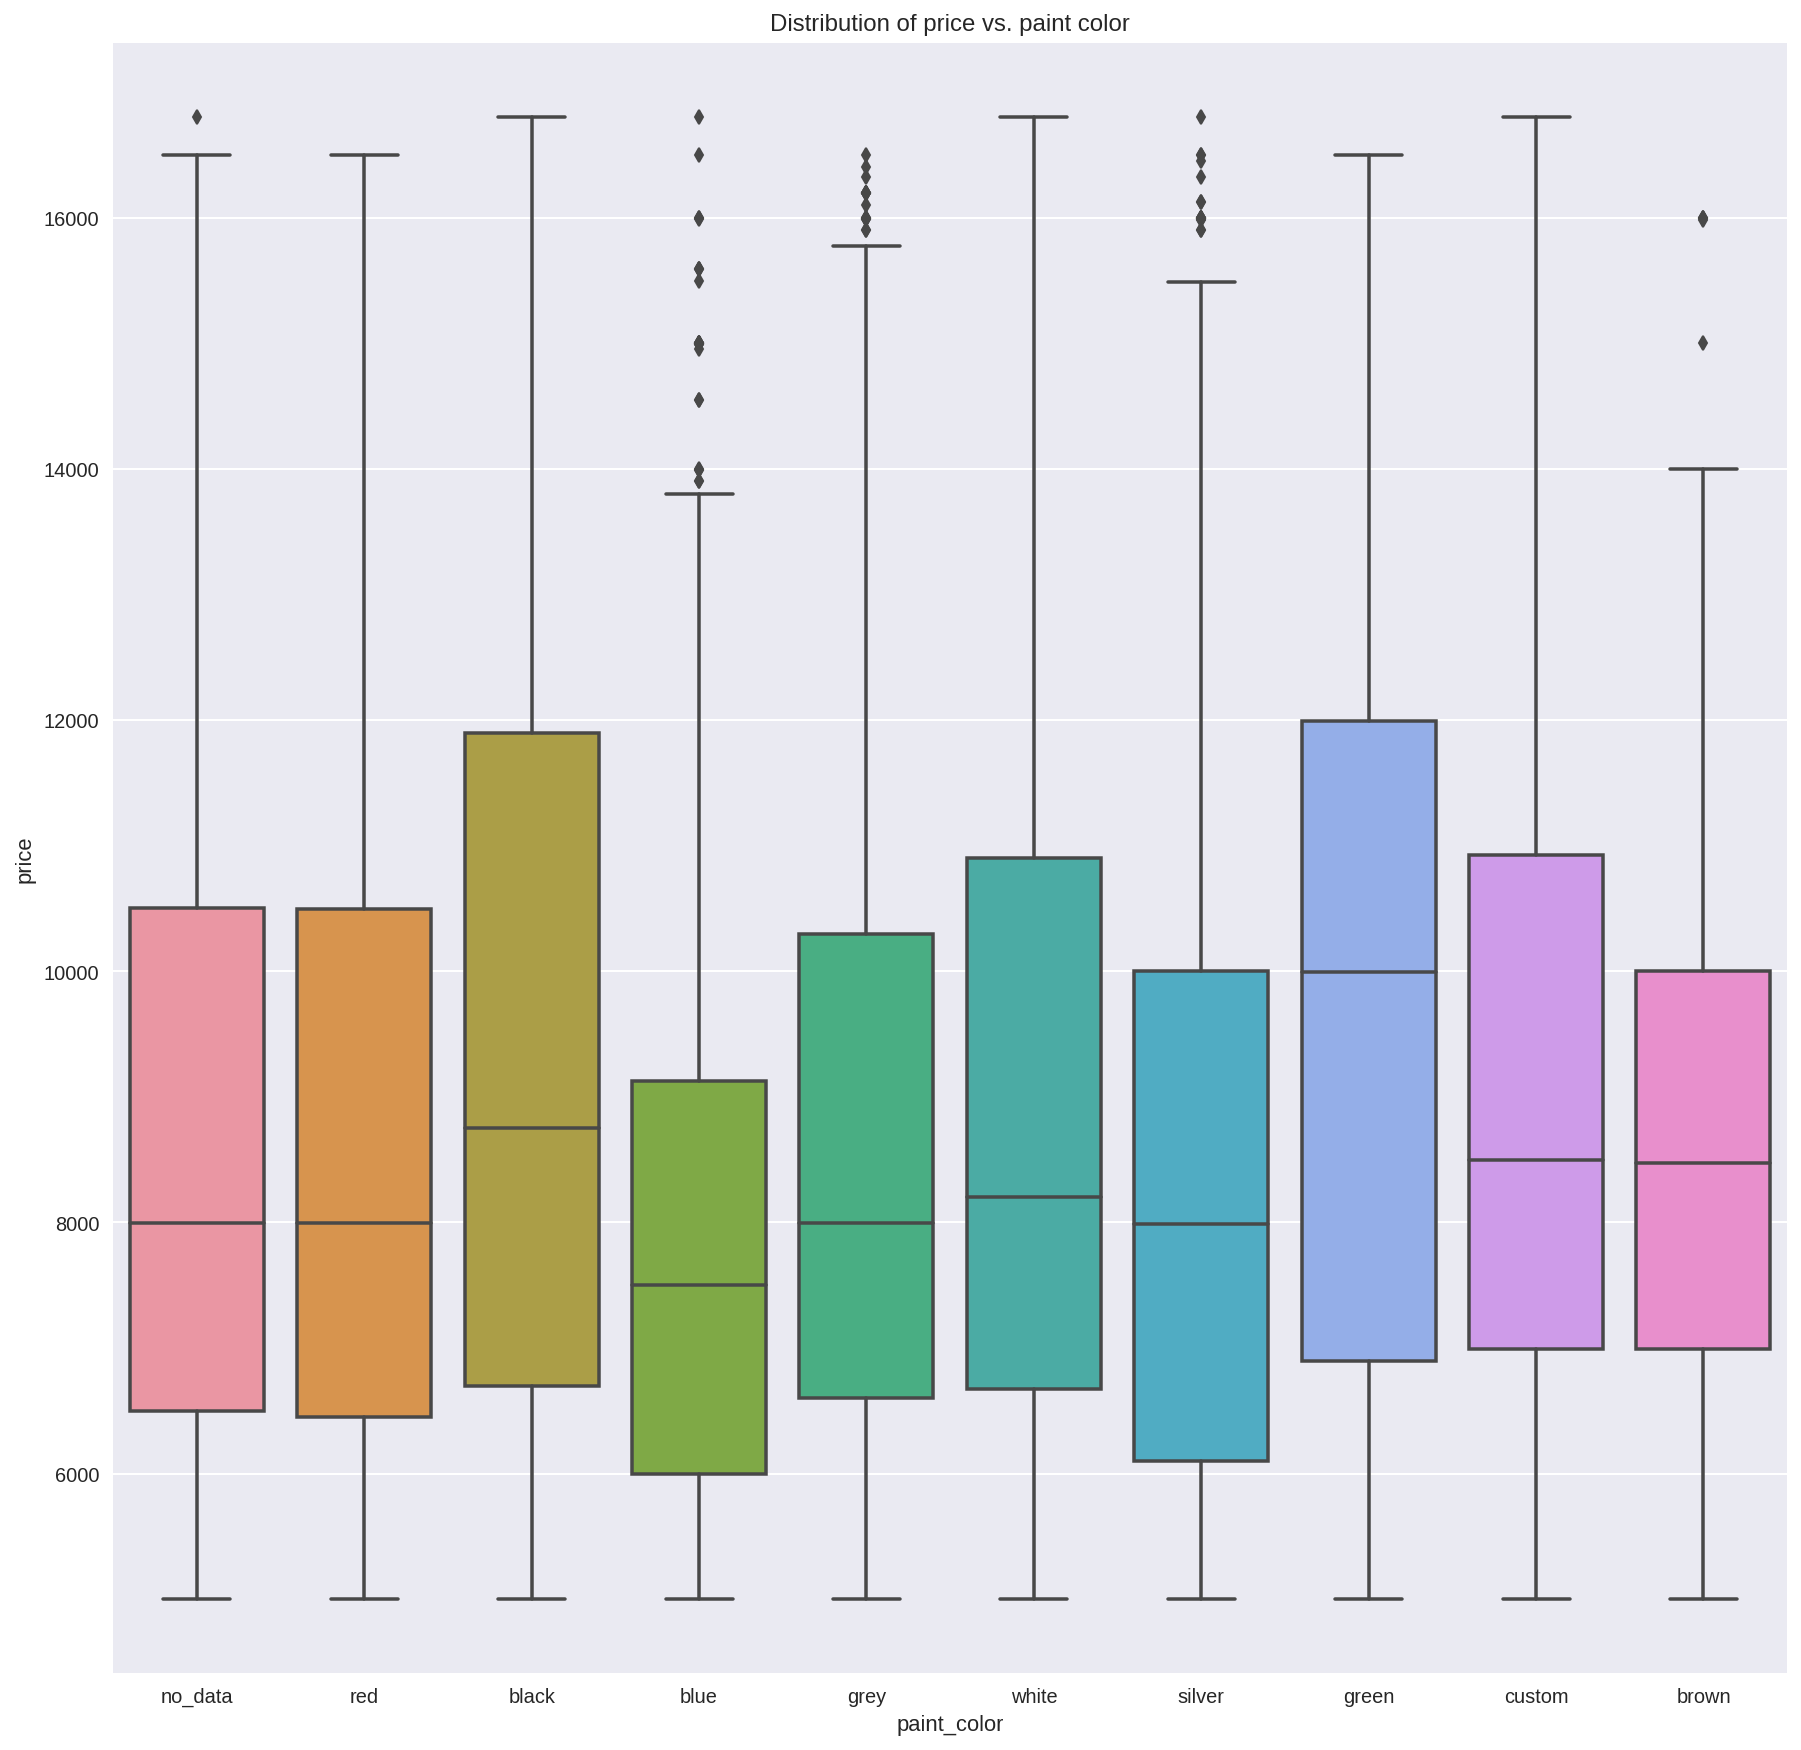

In [65]:
#paint_color 
qualitative_data=['price','paint_color','transmission', 'condition']
fig, ax = plt.subplots(figsize=(15, 15))
plot=sns.boxplot(x='paint_color', y='price',
                 data=greatest_ads_data_qual.query('paint_color != "orange" and paint_color!= "purple" and paint_color!="yellow"'), 
                 ax=ax)
paint_color_price=greatest_ads_data_qual.query('paint_color != "orange" and paint_color!= "purple" and paint_color!="yellow"').pivot_table(index='paint_color', 
                                                     values='price', aggfunc=['min','mean', 'median','max', 'std', 'count'])

paint_color_price.columns=['min', 'mean', 'med', 'max', 'std', 'count']
paint_color_price.sort_values('max', ascending=False)
plt.title('Distribution of price vs. paint color')

### transmission factor
The `transmission` factor was plotted in a boxplot comparing transmission types and price. The transmission type that had the greatest mean was manual with values of 9094.35 USD. However, the manual transmission, also presented the greatest standard deviation values for price, with a value of 3358.63 USD . The greatest value for price was for a vehicle with automatic transmission, however, that value was an outlier greater than 1.5 IQR for automatic transmission. 

Text(0.5, 1.0, 'Distribution of price vs. transmission type')

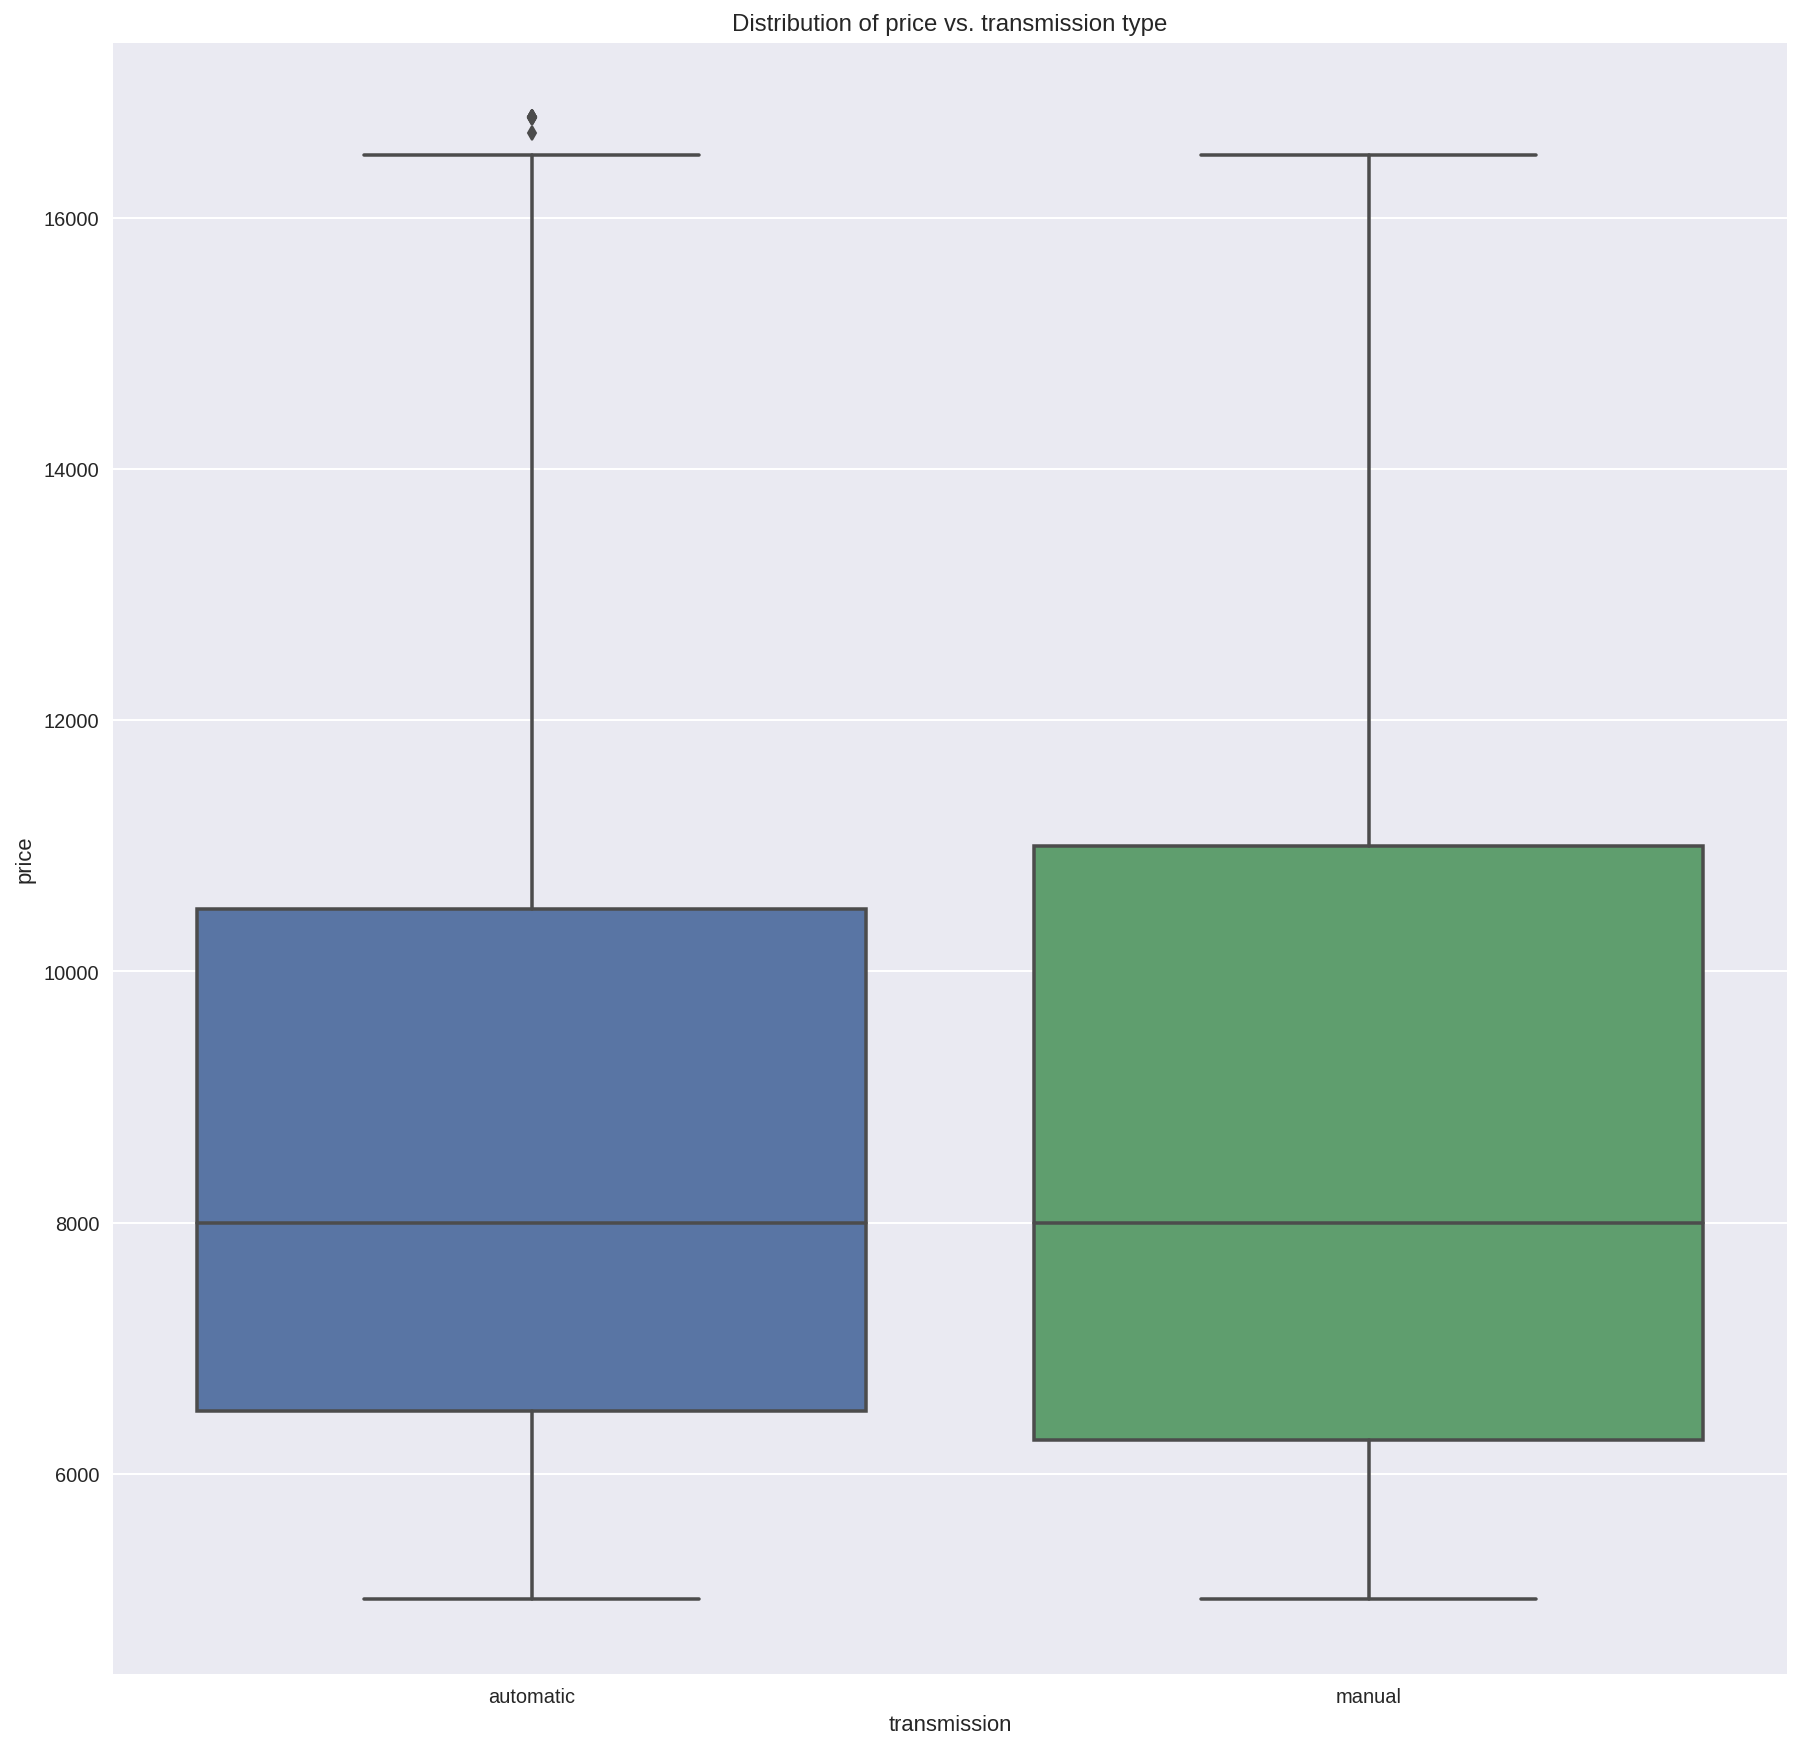

In [66]:
#transmission
fig, ax = plt.subplots(figsize=(15, 15))
plot=sns.boxplot(x='transmission', y='price', data=greatest_ads_data_qual.query('transmission!="other"'), ax=ax)

transmission_price=greatest_ads_data_qual.query('transmission!="other"').pivot_table(
    index='transmission',values='price', aggfunc=['min','mean', 'median','max', 'std', 'count'])


transmission_price.columns=['min', 'mean', 'med', 'max', 'std', 'count']
transmission_price.sort_values('mean', ascending=False)
plt.title('Distribution of price vs. transmission type')

## General conclusion

Based on the price factors section, we concluded that there was a weak, negative correlation between the age of a vehicle and price. The __vehicle_age__ parameter presented a postive skewed distribution, with a mean of 8.52 years, a median of 7.00 years, and a standard deviation of 6.12 years. Based on the Boxplot, we identified ouliers greater than 1.5 IQR.  Contrastingly, mileage had a negative, but weaker correlation for price of a vehicle than vehicle age. The mileage parameter presented a postive skewed distribution, with a mean of 18,936.13 miles per year, a median of 15,279.64 miles per year. miles, and a standard deviation of 19,555.22 miles per year. Based on the Boxplot, we identified ouliers greater than 1.5 IQR.


The condition rating category that had the highest average of price of a vehicle was catefory 5, or classified as 'like new'. The category that had the smallest mean was category 3, or classified as 'good'. The condition factor was plotted in a boxplot comparing condition rating category and price. The top 2 rating categories that had the greatest means were 5 and 4, with values of 9276.29 USD, and 9056.99 USD, respectively. We omitted the rating categories with less than 50 ads: categories 1,2, and 6. However, the top 2 rating categories that had the greatest means, also presented the greatest standard deviation values for price. Raing category 5 had a standard deviation of 3133.22 USD; raing category 4 had a standard deviation of 2876.00 USD; while rating 3 had the smallest mean out of the categories, with ad counts greater than 50, raing category 3 had a standard deviation of 2754.59 USD . The greatest value for price was for a vehicle with rating catefory of 4, with a value of 16803 and it was not an outlier greater than 1.5 IQR for rating category 4.


For the paint color factor, the paint color that had on average the greatest price amount was green, and the paint color that had the smallest price amount, on average, was blue. The paint_color factor was plotted in a boxplot comparing paint colors and price. The top 3 colors that had the greatest means were colors: green, black and custom, with values of 9875.55 USD, 9404.90 USD, and 9039.94 USD, respectively. We omitted paint colots with less than 50 ads for paint color categories: orange, purple and yellow. However, the top 2 colors that had the greatest means, also presented the greatest standard deviation values for price, with values of 3250.82 USD, 3190.58 USD, respectively. The greatest value for price was for a vehicle with paint color silver, however, that value was an outlier greater than 1.5 IQR for paint color silver.

Finally, the transmission that had the greatest price amount, on average, was manual transmission. The transmission factor was plotted in a boxplot comparing transmission types and price. The transmission type that had the greatest mean was manual with values of 9094.35 USD. However, the manual transmission, also presented the greatest standard deviation values for price, with a value of 3358.63 USD . The greatest value for price was for a vehicle with automatic transmission, however, that value was an outlier greater than 1.5 IQR for automatic transmission.